# IMPORTS

In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from config import *
from models import *
from metrics import *
from evaluation import *
from augmentor import Augmentor
from data_generator import DataGenerator

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import random
import json
from datetime import datetime
import pickle
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Training

In [1]:
# AUGMENT IMAGES 
TEST_NAMES = ['TCGA-G9-6336-01Z-00-DX1', 'TCGA-A7-A13F-01Z-00-DX1', 'TCGA-21-5784-01Z-00-DX1']


# augment original
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      ORIGINAL_IMG_PATH, 
                      TRAIN_IMG_PATH, 
                      destination_test_path=TEST_IMG_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()

# augment masks
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      ORIGINAL_MASK_PATH, 
                      TRAIN_MASK_PATH, 
                      destination_test_path=TEST_MASK_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()

# augment vahadane
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      VAHADANE_IMG_PATH, 
                      VAHADANE_TRAIN_IMG_PATH, 
                      destination_test_path=VAHADANE_TEST_IMG_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()

# augment macenko
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      MACENKO_IMG_PATH, 
                      MACENKO_TRAIN_IMG_PATH, 
                      destination_test_path=MACENKO_TEST_IMG_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()

#augment hemato
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      HEMATO_IMG_PATH, 
                      HEMATO_TRAIN_IMG_PATH, 
                      destination_test_path=HEMATO_TEST_IMG_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()


In [ ]:
# shrink originals (ratio 200:128)

img_names = [f for f in os.listdir(ORIGINAL_IMG_PATH)]

for name in img_names:
    img = cv2.imread(ORIGINAL_IMG_PATH + name)
    #200:128 => 1000:640
    resized = cv2.resize(img, (640, 640))
    cv2.imwrite(SHRANK_IMG_PATH + name, resized)
    
#augment shrank images
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      SHRANK_IMG_PATH, 
                      SHRANK_TRAIN_IMG_PATH, 
                      destination_test_path=SHRANK_TEST_IMG_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()  

In [25]:
TEST_NAMES = ['TCGA-G9-6336-01Z-00-DX1', 'TCGA-A7-A13F-01Z-00-DX1', 'TCGA-21-5784-01Z-00-DX1']
mask_names = [f for f in os.listdir(ORIGINAL_MASK_PATH)]

for name in mask_names:
    img = cv2.imread(ORIGINAL_MASK_PATH + name)
    #200:128 => 1000:640
    resized = cv2.resize(img, (640, 640))
    cv2.imwrite(SHRANK_MASK_PATH + name, resized)

#augment shrank masks
augmentor = Augmentor(PATCH_WIDTH, 
                      PATCH_HEIGHT, 
                      DEFAULT_STRIDE, 
                      SHRANK_MASK_PATH, 
                      SHRANK_TRAIN_MASK_PATH, 
                      destination_test_path=SHRANK_TEST_MASK_PATH,
                      test_names=TEST_NAMES)
augmentor.generate_patches()  

In [7]:
# SET CONSTANTS
seed = 42
random.seed = seed
np.random.seed = seed

use_fraction = 0.5
validation_fraction = 0.1

batch_size = 32
validation_batch_size = int(batch_size*validation_fraction)

In [8]:
# GET IMAGE NAMES
names = [f for f in os.listdir(TRAIN_IMG_PATH)]
np.random.shuffle(names)

used_names = names[:int(len(names)*use_fraction)]

validation_index = -int(len(used_names)*validation_fraction)

training_names = used_names[:validation_index]
validation_names = used_names[validation_index:]

In [4]:
## TRAIN ON ORIGINALS

# SET MODEL NAME
MODEL_NAME = 'wo_normalization'

# GET GENERATORS
training_generator = DataGenerator(training_names, TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=batch_size)
validation_generator = DataGenerator(validation_names, TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=validation_batch_size)

# GET MODEL 
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)
model = base_model()

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

# SAVE MODEL AS JSON

NameError: name 'training_names' is not defined

In [7]:
## TRAIN ON ORIGINALS 2

# SET MODEL NAME
MODEL_NAME = 'wo_normalization_2'

# KEEP MODEL AND GENERATORS

# UPDATE CHECKPOINTER 
checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Epoch 1/10
1249/1249 [==============================] - 1870s 1s/step - loss: 0.1660 - jaccard_distance: 0.1012 - val_loss: 0.1888 - val_jaccard_distance: 0.1007

Epoch 00001: val_loss improved from inf to 0.18879, saving model to D:\user_data\xtrnavska\dumps\models\wo_normalization_2.h5
Epoch 2/10
1249/1249 [==============================] - 1893s 2s/step - loss: 0.1643 - jaccard_distance: 0.1002 - val_loss: 0.2017 - val_jaccard_distance: 0.0935

Epoch 00002: val_loss did not improve from 0.18879
Epoch 3/10
1249/1249 [==============================] - 1882s 2s/step - loss: 0.1629 - jaccard_distance: 0.0993 - val_loss: 0.2282 - val_jaccard_distance: 0.0960

Epoch 00003: val_loss did not improve from 0.18879
Epoch 4/10
1249/1249 [==============================] - 1859s 1s/step - loss: 0.1612 - jaccard_distance: 0.0983 - val_loss: 0.2303 - val_jaccard_distance: 0.0971

Epoch 00004: val_loss did not improve from 0.18879
Epoch 5/10
1249/1249 [==============================] - 1869s 1s/step

In [8]:
## TRAIN ON MACENKO

# SET MODEL NAME
MODEL_NAME = 'macenko'

# GET GENERATORS
training_generator = DataGenerator(training_names, MACENKO_TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=batch_size)
validation_generator = DataGenerator(validation_names, MACENKO_TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=validation_batch_size)

# GET MODEL 
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)
model = base_model()

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 128, 128, 16) 0           conv2d_20[0][0]                  
____________________________________________________________________________________________

Epoch 1/10
1249/1249 [==============================] - 2097s 2s/step - loss: 0.2540 - jaccard_distance: 0.1536 - val_loss: 0.2382 - val_jaccard_distance: 0.1308

Epoch 00001: val_loss improved from inf to 0.23825, saving model to D:\user_data\xtrnavska\dumps\models\macenko.h5
Epoch 2/10
1249/1249 [==============================] - 1878s 2s/step - loss: 0.2109 - jaccard_distance: 0.1281 - val_loss: 0.1094 - val_jaccard_distance: 0.1246

Epoch 00002: val_loss improved from 0.23825 to 0.10937, saving model to D:\user_data\xtrnavska\dumps\models\macenko.h5
Epoch 3/10
1249/1249 [==============================] - 1868s 1s/step - loss: 0.1996 - jaccard_distance: 0.1214 - val_loss: 0.1585 - val_jaccard_distance: 0.1149

Epoch 00003: val_loss did not improve from 0.10937
Epoch 4/10
1249/1249 [==============================] - 1871s 1s/step - loss: 0.1905 - jaccard_distance: 0.1159 - val_loss: 0.2306 - val_jaccard_distance: 0.1110

Epoch 00004: val_loss did not improve from 0.10937
Epoch 5/10
1

In [9]:
## TRAIN ON MACENKO 2

# SET MODEL NAME
MODEL_NAME = 'macenko_2'

# KEEP MODEL AND GENERATORS

# UPDATE CHECKPOINTER 
checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Epoch 1/10
1249/1249 [==============================] - 1887s 2s/step - loss: 0.1630 - jaccard_distance: 0.0993 - val_loss: 0.1660 - val_jaccard_distance: 0.0967

Epoch 00001: val_loss improved from inf to 0.16596, saving model to D:\user_data\xtrnavska\dumps\models\macenko_2.h5
Epoch 2/10
1249/1249 [==============================] - 1887s 2s/step - loss: 0.1611 - jaccard_distance: 0.0982 - val_loss: 0.2344 - val_jaccard_distance: 0.0964

Epoch 00002: val_loss did not improve from 0.16596
Epoch 3/10
1249/1249 [==============================] - 1899s 2s/step - loss: 0.1594 - jaccard_distance: 0.0972 - val_loss: 0.0828 - val_jaccard_distance: 0.0948

Epoch 00003: val_loss improved from 0.16596 to 0.08280, saving model to D:\user_data\xtrnavska\dumps\models\macenko_2.h5
Epoch 4/10
1249/1249 [==============================] - 1889s 2s/step - loss: 0.1581 - jaccard_distance: 0.0964 - val_loss: 0.0952 - val_jaccard_distance: 0.0954

Epoch 00004: val_loss did not improve from 0.08280
Epoch 5/

In [10]:
## TRAIN ON VAHADANE

# SET MODEL NAME
MODEL_NAME = 'vahadane'

# GET GENERATORS
training_generator = DataGenerator(training_names, VAHADANE_TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=batch_size)
validation_generator = DataGenerator(validation_names, VAHADANE_TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=validation_batch_size)

# GET MODEL 
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)
model = base_model()

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 128, 128, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 128, 128, 16) 448         lambda_3[0][0]                   
__________________________________________________________________________________________________
dropout_19 (Dropout)            (None, 128, 128, 16) 0           conv2d_39[0][0]                  
____________________________________________________________________________________________

Epoch 1/10
1249/1249 [==============================] - 2085s 2s/step - loss: 0.2737 - jaccard_distance: 0.1661 - val_loss: 0.2451 - val_jaccard_distance: 0.1332

Epoch 00001: val_loss improved from inf to 0.24506, saving model to D:\user_data\xtrnavska\dumps\models\vahadane.h5
Epoch 2/10
1249/1249 [==============================] - 1901s 2s/step - loss: 0.2186 - jaccard_distance: 0.1327 - val_loss: 0.1450 - val_jaccard_distance: 0.1222

Epoch 00002: val_loss improved from 0.24506 to 0.14501, saving model to D:\user_data\xtrnavska\dumps\models\vahadane.h5
Epoch 3/10
1249/1249 [==============================] - 1905s 2s/step - loss: 0.2032 - jaccard_distance: 0.1236 - val_loss: 0.1938 - val_jaccard_distance: 0.1167

Epoch 00003: val_loss did not improve from 0.14501
Epoch 4/10
1249/1249 [==============================] - 1922s 2s/step - loss: 0.1935 - jaccard_distance: 0.1178 - val_loss: 0.2034 - val_jaccard_distance: 0.1111

Epoch 00004: val_loss did not improve from 0.14501
Epoch 5/10

In [11]:
## TRAIN ON VAHADANE 2

# SET MODEL NAME
MODEL_NAME = 'vahadane_2'

# KEEP MODEL AND GENERATORS

# UPDATE CHECKPOINTER 
checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Epoch 1/10
1249/1249 [==============================] - 1909s 2s/step - loss: 0.1645 - jaccard_distance: 0.1003 - val_loss: 0.1212 - val_jaccard_distance: 0.0973

Epoch 00001: val_loss improved from inf to 0.12116, saving model to D:\user_data\xtrnavska\dumps\models\vahadane_2.h5
Epoch 2/10
1249/1249 [==============================] - 2006s 2s/step - loss: 0.1631 - jaccard_distance: 0.0994 - val_loss: 0.1231 - val_jaccard_distance: 0.0984

Epoch 00002: val_loss did not improve from 0.12116
Epoch 3/10
1249/1249 [==============================] - 2040s 2s/step - loss: 0.1613 - jaccard_distance: 0.0983 - val_loss: 0.0875 - val_jaccard_distance: 0.0984

Epoch 00003: val_loss improved from 0.12116 to 0.08749, saving model to D:\user_data\xtrnavska\dumps\models\vahadane_2.h5
Epoch 4/10
1249/1249 [==============================] - 2080s 2s/step - loss: 0.1598 - jaccard_distance: 0.0974 - val_loss: 0.1869 - val_jaccard_distance: 0.0945

Epoch 00004: val_loss did not improve from 0.08749
Epoch 

In [6]:
## TRAIN ON HEMATO

# SET MODEL NAME
MODEL_NAME = 'hemato'

# GET GENERATORS
training_generator = DataGenerator(training_names, HEMATO_TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=batch_size)
validation_generator = DataGenerator(validation_names, HEMATO_TRAIN_IMG_PATH, TRAIN_MASK_PATH, batch_size=validation_batch_size)

# GET MODEL 
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)
model = base_model()

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128, 128, 16) 0           conv2d_1[0][0]                   
____________________________________________________________________________________________

Epoch 1/10
1249/1249 [==============================] - 3747s 3s/step - loss: 0.2632 - jaccard_distance: 0.1602 - val_loss: 0.2336 - val_jaccard_distance: 0.1345

Epoch 00001: val_loss improved from inf to 0.23358, saving model to D:\user_data\xtrnavska\dumps\models\hemato.h5
Epoch 2/10
1249/1249 [==============================] - 1714s 1s/step - loss: 0.2196 - jaccard_distance: 0.1336 - val_loss: 0.2448 - val_jaccard_distance: 0.1238

Epoch 00002: val_loss did not improve from 0.23358
Epoch 3/10
1249/1249 [==============================] - 1724s 1s/step - loss: 0.2076 - jaccard_distance: 0.1264 - val_loss: 0.2087 - val_jaccard_distance: 0.1199

Epoch 00003: val_loss improved from 0.23358 to 0.20868, saving model to D:\user_data\xtrnavska\dumps\models\hemato.h5
Epoch 4/10
1249/1249 [==============================] - 1764s 1s/step - loss: 0.1992 - jaccard_distance: 0.1213 - val_loss: 0.1306 - val_jaccard_distance: 0.1180

Epoch 00004: val_loss improved from 0.20868 to 0.13060, saving mo

In [7]:
## TRAIN ON HEMATO 2

# SET MODEL NAME
MODEL_NAME = 'hemato_2'

# KEEP MODEL AND GENERATORS

# UPDATE CHECKPOINTER 
checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Epoch 1/10
1249/1249 [==============================] - 2031s 2s/step - loss: 0.1720 - jaccard_distance: 0.1048 - val_loss: 0.1524 - val_jaccard_distance: 0.1042

Epoch 00001: val_loss improved from inf to 0.15241, saving model to D:\user_data\xtrnavska\dumps\models\hemato_2.h5
Epoch 2/10
1249/1249 [==============================] - 2018s 2s/step - loss: 0.1701 - jaccard_distance: 0.1037 - val_loss: 0.1029 - val_jaccard_distance: 0.1020

Epoch 00002: val_loss improved from 0.15241 to 0.10286, saving model to D:\user_data\xtrnavska\dumps\models\hemato_2.h5
Epoch 3/10
1249/1249 [==============================] - 2065s 2s/step - loss: 0.1683 - jaccard_distance: 0.1026 - val_loss: 0.2681 - val_jaccard_distance: 0.1002

Epoch 00003: val_loss did not improve from 0.10286
Epoch 4/10
1249/1249 [==============================] - 2042s 2s/step - loss: 0.1669 - jaccard_distance: 0.1018 - val_loss: 0.1368 - val_jaccard_distance: 0.1003

Epoch 00004: val_loss did not improve from 0.10286
Epoch 5/10

In [22]:
## TRAIN ON SHRANK

# GET IMAGE NAMES
names = [f for f in os.listdir(SHRANK_TRAIN_IMG_PATH)]
np.random.shuffle(names)

used_names = names[:int(len(names)*use_fraction)]

validation_index = -int(len(used_names)*validation_fraction)

training_names = used_names[:validation_index]
validation_names = used_names[validation_index:]

# SET MODEL NAME
MODEL_NAME = 'shrank'

# GET GENERATORS
training_generator = DataGenerator(training_names, SHRANK_TRAIN_IMG_PATH, SHRANK_TRAIN_MASK_PATH, batch_size=batch_size)
validation_generator = DataGenerator(validation_names, SHRANK_TRAIN_IMG_PATH, SHRANK_TRAIN_MASK_PATH, batch_size=validation_batch_size)

# GET MODEL 
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)
model = base_model()

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 128, 128, 16) 0           conv2d_20[0][0]                  
____________________________________________________________________________________________

Epoch 1/10
463/463 [==============================] - 1206s 3s/step - loss: 0.3114 - jaccard_distance: 0.1913 - val_loss: 0.3900 - val_jaccard_distance: 0.1649

Epoch 00001: val_loss improved from inf to 0.38999, saving model to D:\user_data\xtrnavska\dumps\models\shrank.h5
Epoch 2/10
463/463 [==============================] - 659s 1s/step - loss: 0.2459 - jaccard_distance: 0.1503 - val_loss: 0.2767 - val_jaccard_distance: 0.1359

Epoch 00002: val_loss improved from 0.38999 to 0.27665, saving model to D:\user_data\xtrnavska\dumps\models\shrank.h5
Epoch 3/10
463/463 [==============================] - 666s 1s/step - loss: 0.2285 - jaccard_distance: 0.1397 - val_loss: 0.1668 - val_jaccard_distance: 0.1333

Epoch 00003: val_loss improved from 0.27665 to 0.16682, saving model to D:\user_data\xtrnavska\dumps\models\shrank.h5
Epoch 4/10
463/463 [==============================] - 661s 1s/step - loss: 0.2190 - jaccard_distance: 0.1340 - val_loss: 0.2413 - val_jaccard_distance: 0.1244

Epoch 000

In [23]:
# SET MODEL NAME
MODEL_NAME = 'shrank_2'

# KEEP GENERATORS AND MODEL

checkpointer = ModelCheckpoint(MODELS_PATH + MODEL_NAME +'.h5', verbose=1, save_best_only=True)

# TRAIN MODEL 
history = model.fit(training_generator, validation_data=validation_generator, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

# SAVE MODELS HISTORY 
with open(DUMPS_PATH + MODEL_NAME +'_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Epoch 1/10
463/463 [==============================] - 654s 1s/step - loss: 0.1796 - jaccard_distance: 0.1098 - val_loss: 0.1632 - val_jaccard_distance: 0.1067

Epoch 00001: val_loss improved from inf to 0.16325, saving model to D:\user_data\xtrnavska\dumps\models\shrank_2.h5
Epoch 2/10
463/463 [==============================] - 654s 1s/step - loss: 0.1764 - jaccard_distance: 0.1079 - val_loss: 0.0994 - val_jaccard_distance: 0.1056

Epoch 00002: val_loss improved from 0.16325 to 0.09937, saving model to D:\user_data\xtrnavska\dumps\models\shrank_2.h5
Epoch 3/10
463/463 [==============================] - 657s 1s/step - loss: 0.1739 - jaccard_distance: 0.1063 - val_loss: 0.1919 - val_jaccard_distance: 0.1083

Epoch 00003: val_loss did not improve from 0.09937
Epoch 4/10
463/463 [==============================] - 654s 1s/step - loss: 0.1711 - jaccard_distance: 0.1047 - val_loss: 0.1750 - val_jaccard_distance: 0.1040

Epoch 00004: val_loss did not improve from 0.09937
Epoch 5/10
463/463 [==

In [13]:
from evaluation import *

In [14]:
MODEL_NAME = 'wo_normalization'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', TEST_IMG_PATH, TEST_MASK_PATH)
dump(results, MODEL_NAME + '_test_results', DUMPS_PATH)

['TCGA-21-5784-01Z-00-DX1_0_0.png', 'TCGA-21-5784-01Z-00-DX1_0_120.png', 'TCGA-21-5784-01Z-00-DX1_0_160.png', 'TCGA-21-5784-01Z-00-DX1_0_200.png', 'TCGA-21-5784-01Z-00-DX1_0_240.png', 'TCGA-21-5784-01Z-00-DX1_0_280.png', 'TCGA-21-5784-01Z-00-DX1_0_320.png', 'TCGA-21-5784-01Z-00-DX1_0_360.png', 'TCGA-21-5784-01Z-00-DX1_0_40.png', 'TCGA-21-5784-01Z-00-DX1_0_400.png', 'TCGA-21-5784-01Z-00-DX1_0_440.png', 'TCGA-21-5784-01Z-00-DX1_0_480.png', 'TCGA-21-5784-01Z-00-DX1_0_520.png', 'TCGA-21-5784-01Z-00-DX1_0_560.png', 'TCGA-21-5784-01Z-00-DX1_0_600.png', 'TCGA-21-5784-01Z-00-DX1_0_640.png', 'TCGA-21-5784-01Z-00-DX1_0_680.png', 'TCGA-21-5784-01Z-00-DX1_0_720.png', 'TCGA-21-5784-01Z-00-DX1_0_760.png', 'TCGA-21-5784-01Z-00-DX1_0_80.png', 'TCGA-21-5784-01Z-00-DX1_0_800.png', 'TCGA-21-5784-01Z-00-DX1_0_840.png', 'TCGA-21-5784-01Z-00-DX1_0_872.png', 'TCGA-21-5784-01Z-00-DX1_120_0.png', 'TCGA-21-5784-01Z-00-DX1_120_120.png', 'TCGA-21-5784-01Z-00-DX1_120_160.png', 'TCGA-21-5784-01Z-00-DX1_120_200.png'

TCGA-21-5784-01Z-00-DX1_0_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_120.png
TCGA-21-5784-01Z-00-DX1_0_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_160.png
TCGA-21-5784-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_200.png
TCGA-21-5784-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_240.png
TCGA-21-5784-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_280.png
TCGA-21-5784-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_320.png
TCGA-21-5784-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_360.png
TCGA-21-5784-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_40.png
TCGA-21-5784-01Z-00-DX1_0_400.png


TCGA-21-5784-01Z-00-DX1_160_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_160_872.png
TCGA-21-5784-01Z-00-DX1_200_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_0.png
TCGA-21-5784-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_120.png
TCGA-21-5784-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_160.png
TCGA-21-5784-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_200.png
TCGA-21-5784-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_240.png
TCGA-21-5784-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_280.png
TCGA-21-5784-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_320.png
TCGA

TCGA-21-5784-01Z-00-DX1_280_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_80.png
TCGA-21-5784-01Z-00-DX1_280_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_800.png
TCGA-21-5784-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_840.png
TCGA-21-5784-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_872.png
TCGA-21-5784-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_0.png
TCGA-21-5784-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_120.png
TCGA-21-5784-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_160.png
TCGA-21-5784-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_200.png
TCGA-2

TCGA-21-5784-01Z-00-DX1_400_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_680.png
TCGA-21-5784-01Z-00-DX1_400_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_720.png
TCGA-21-5784-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_760.png
TCGA-21-5784-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_80.png
TCGA-21-5784-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_800.png
TCGA-21-5784-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_840.png
TCGA-21-5784-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_872.png
TCGA-21-5784-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_0.png
TCGA-21-

TCGA-21-5784-01Z-00-DX1_480_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_600.png
TCGA-21-5784-01Z-00-DX1_480_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_640.png
TCGA-21-5784-01Z-00-DX1_480_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_680.png
TCGA-21-5784-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_720.png
TCGA-21-5784-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_760.png
TCGA-21-5784-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_80.png
TCGA-21-5784-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_800.png
TCGA-21-5784-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_840.png
TC

TCGA-21-5784-01Z-00-DX1_600_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_480.png
TCGA-21-5784-01Z-00-DX1_600_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_520.png
TCGA-21-5784-01Z-00-DX1_600_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_560.png
TCGA-21-5784-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_600.png
TCGA-21-5784-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_640.png
TCGA-21-5784-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_680.png
TCGA-21-5784-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_720.png
TCGA-21-5784-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_760.png


TCGA-21-5784-01Z-00-DX1_720_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_40.png
TCGA-21-5784-01Z-00-DX1_720_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_400.png
TCGA-21-5784-01Z-00-DX1_720_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_440.png
TCGA-21-5784-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_480.png
TCGA-21-5784-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_520.png
TCGA-21-5784-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_560.png
TCGA-21-5784-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_600.png
TCGA-21-5784-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_640.png
TC

TCGA-21-5784-01Z-00-DX1_80_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_280.png
TCGA-21-5784-01Z-00-DX1_80_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_320.png
TCGA-21-5784-01Z-00-DX1_80_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_360.png
TCGA-21-5784-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_40.png
TCGA-21-5784-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_400.png
TCGA-21-5784-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_440.png
TCGA-21-5784-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_480.png
TCGA-21-5784-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_520.png
TCGA-21-5784-01Z-0

TCGA-A7-A13F-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_200.png
TCGA-A7-A13F-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_240.png
TCGA-A7-A13F-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_280.png
TCGA-A7-A13F-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_320.png
TCGA-A7-A13F-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_360.png
TCGA-A7-A13F-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_40.png
TCGA-A7-A13F-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_400.png
TCGA-A7-A13F-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_440.png
TCGA-A7-A13F-01Z-00-DX1_0_480.png


TCGA-A7-A13F-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_120.png
TCGA-A7-A13F-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_160.png
TCGA-A7-A13F-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_200.png
TCGA-A7-A13F-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_240.png
TCGA-A7-A13F-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_280.png
TCGA-A7-A13F-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_320.png
TCGA-A7-A13F-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_360.png
TCGA-A7-A13F-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_40.png
TC

TCGA-A7-A13F-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_280_840.png
TCGA-A7-A13F-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_280_872.png
TCGA-A7-A13F-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_0.png
TCGA-A7-A13F-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_120.png
TCGA-A7-A13F-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_160.png
TCGA-A7-A13F-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_200.png
TCGA-A7-A13F-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_240.png
TCGA-A7-A13F-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_280.png
TCGA

TCGA-A7-A13F-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_760.png
TCGA-A7-A13F-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_80.png
TCGA-A7-A13F-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_800.png
TCGA-A7-A13F-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_840.png
TCGA-A7-A13F-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_872.png
TCGA-A7-A13F-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_0.png
TCGA-A7-A13F-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_120.png
TCGA-A7-A13F-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_160.png
TCGA-A7-A13F

TCGA-A7-A13F-01Z-00-DX1_480_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_680.png
TCGA-A7-A13F-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_720.png
TCGA-A7-A13F-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_760.png
TCGA-A7-A13F-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_80.png
TCGA-A7-A13F-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_800.png
TCGA-A7-A13F-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_840.png
TCGA-A7-A13F-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_872.png
TCGA-A7-A13F-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_0.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_600_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_560.png
TCGA-A7-A13F-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_600.png
TCGA-A7-A13F-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_640.png
TCGA-A7-A13F-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_680.png
TCGA-A7-A13F-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_720.png
TCGA-A7-A13F-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_760.png
TCGA-A7-A13F-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_80.png
TCGA-A7-A13F-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_800.png
TC

TCGA-A7-A13F-01Z-00-DX1_720_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_440.png
TCGA-A7-A13F-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_480.png
TCGA-A7-A13F-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_520.png
TCGA-A7-A13F-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_560.png
TCGA-A7-A13F-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_600.png
TCGA-A7-A13F-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_640.png
TCGA-A7-A13F-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_680.png
TCGA-A7-A13F-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_720.png


TCGA-A7-A13F-01Z-00-DX1_80_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_360.png
TCGA-A7-A13F-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_40.png
TCGA-A7-A13F-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_400.png
TCGA-A7-A13F-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_440.png
TCGA-A7-A13F-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_480.png
TCGA-A7-A13F-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_520.png
TCGA-A7-A13F-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_560.png
TCGA-A7-A13F-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_600.png
TCGA-A7-A13F-01Z-0

TCGA-G9-6336-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_280.png
TCGA-G9-6336-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_320.png
TCGA-G9-6336-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_360.png
TCGA-G9-6336-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_40.png
TCGA-G9-6336-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_400.png
TCGA-G9-6336-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_440.png
TCGA-G9-6336-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_480.png
TCGA-G9-6336-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_520.png
TCGA-G9-6336-01Z-00-DX1_0_560.png


TCGA-G9-6336-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_200.png
TCGA-G9-6336-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_240.png
TCGA-G9-6336-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_280.png
TCGA-G9-6336-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_320.png
TCGA-G9-6336-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_360.png
TCGA-G9-6336-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_40.png
TCGA-G9-6336-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_400.png
TCGA-G9-6336-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_440.png
TC

TCGA-G9-6336-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_0.png
TCGA-G9-6336-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_120.png
TCGA-G9-6336-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_160.png
TCGA-G9-6336-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_200.png
TCGA-G9-6336-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_240.png
TCGA-G9-6336-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_280.png
TCGA-G9-6336-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_320.png
TCGA-G9-6336-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_360.png
TCGA

TCGA-G9-6336-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_400_800.png
TCGA-G9-6336-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_400_840.png
TCGA-G9-6336-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_400_872.png
TCGA-G9-6336-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_0.png
TCGA-G9-6336-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_120.png
TCGA-G9-6336-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_160.png
TCGA-G9-6336-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_200.png
TCGA-G9-6336-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_240.png
TCGA-G9-6336-0

TCGA-G9-6336-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_760.png
TCGA-G9-6336-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_80.png
TCGA-G9-6336-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_800.png
TCGA-G9-6336-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_840.png
TCGA-G9-6336-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_872.png
TCGA-G9-6336-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_0.png
TCGA-G9-6336-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_120.png
TCGA-G9-6336-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_160.png
TCGA-G

TCGA-G9-6336-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_640.png
TCGA-G9-6336-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_680.png
TCGA-G9-6336-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_720.png
TCGA-G9-6336-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_760.png
TCGA-G9-6336-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_80.png
TCGA-G9-6336-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_800.png
TCGA-G9-6336-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_840.png
TCGA-G9-6336-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_872.png
TC

TCGA-G9-6336-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_520.png
TCGA-G9-6336-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_560.png
TCGA-G9-6336-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_600.png
TCGA-G9-6336-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_640.png
TCGA-G9-6336-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_680.png
TCGA-G9-6336-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_720.png
TCGA-G9-6336-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_760.png
TCGA-G9-6336-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_80.png
TC

TCGA-G9-6336-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_400.png
TCGA-G9-6336-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_440.png
TCGA-G9-6336-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_480.png
TCGA-G9-6336-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_520.png
TCGA-G9-6336-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_560.png
TCGA-G9-6336-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_600.png
TCGA-G9-6336-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_640.png
TCGA-G9-6336-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_680.png
TCGA-G9-6336-01Z

In [9]:
MODEL_NAME = 'wo_normalization'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', TRAIN_IMG_PATH, TRAIN_MASK_PATH)
dump(results, MODEL_NAME + '_train_results', DUMPS_PATH)

Written to: D:\user_data\xtrnavska\dumps\wo_normalization_train_results__1587721609


In [15]:
MODEL_NAME = 'wo_normalization_2'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', TEST_IMG_PATH, TEST_MASK_PATH)
dump(results, MODEL_NAME + '_test_results', DUMPS_PATH)

['TCGA-21-5784-01Z-00-DX1_0_0.png', 'TCGA-21-5784-01Z-00-DX1_0_120.png', 'TCGA-21-5784-01Z-00-DX1_0_160.png', 'TCGA-21-5784-01Z-00-DX1_0_200.png', 'TCGA-21-5784-01Z-00-DX1_0_240.png', 'TCGA-21-5784-01Z-00-DX1_0_280.png', 'TCGA-21-5784-01Z-00-DX1_0_320.png', 'TCGA-21-5784-01Z-00-DX1_0_360.png', 'TCGA-21-5784-01Z-00-DX1_0_40.png', 'TCGA-21-5784-01Z-00-DX1_0_400.png', 'TCGA-21-5784-01Z-00-DX1_0_440.png', 'TCGA-21-5784-01Z-00-DX1_0_480.png', 'TCGA-21-5784-01Z-00-DX1_0_520.png', 'TCGA-21-5784-01Z-00-DX1_0_560.png', 'TCGA-21-5784-01Z-00-DX1_0_600.png', 'TCGA-21-5784-01Z-00-DX1_0_640.png', 'TCGA-21-5784-01Z-00-DX1_0_680.png', 'TCGA-21-5784-01Z-00-DX1_0_720.png', 'TCGA-21-5784-01Z-00-DX1_0_760.png', 'TCGA-21-5784-01Z-00-DX1_0_80.png', 'TCGA-21-5784-01Z-00-DX1_0_800.png', 'TCGA-21-5784-01Z-00-DX1_0_840.png', 'TCGA-21-5784-01Z-00-DX1_0_872.png', 'TCGA-21-5784-01Z-00-DX1_120_0.png', 'TCGA-21-5784-01Z-00-DX1_120_120.png', 'TCGA-21-5784-01Z-00-DX1_120_160.png', 'TCGA-21-5784-01Z-00-DX1_120_200.png'

TCGA-21-5784-01Z-00-DX1_0_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_120.png
TCGA-21-5784-01Z-00-DX1_0_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_160.png
TCGA-21-5784-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_200.png
TCGA-21-5784-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_240.png
TCGA-21-5784-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_280.png
TCGA-21-5784-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_320.png
TCGA-21-5784-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_360.png
TCGA-21-5784-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_40.png
TCGA-21-5784-01Z-00-DX1_0_400.png


TCGA-21-5784-01Z-00-DX1_160_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_160_872.png
TCGA-21-5784-01Z-00-DX1_200_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_0.png
TCGA-21-5784-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_120.png
TCGA-21-5784-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_160.png
TCGA-21-5784-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_200.png
TCGA-21-5784-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_240.png
TCGA-21-5784-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_280.png
TCGA-21-5784-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_320.png
TCGA

TCGA-21-5784-01Z-00-DX1_280_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_80.png
TCGA-21-5784-01Z-00-DX1_280_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_800.png
TCGA-21-5784-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_840.png
TCGA-21-5784-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_872.png
TCGA-21-5784-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_0.png
TCGA-21-5784-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_120.png
TCGA-21-5784-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_160.png
TCGA-21-5784-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_200.png
TCGA-2

TCGA-21-5784-01Z-00-DX1_400_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_680.png
TCGA-21-5784-01Z-00-DX1_400_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_720.png
TCGA-21-5784-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_760.png
TCGA-21-5784-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_80.png
TCGA-21-5784-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_800.png
TCGA-21-5784-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_840.png
TCGA-21-5784-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_872.png
TCGA-21-5784-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_0.png
TCGA-21-

TCGA-21-5784-01Z-00-DX1_480_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_600.png
TCGA-21-5784-01Z-00-DX1_480_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_640.png
TCGA-21-5784-01Z-00-DX1_480_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_680.png
TCGA-21-5784-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_720.png
TCGA-21-5784-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_760.png
TCGA-21-5784-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_80.png
TCGA-21-5784-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_800.png
TCGA-21-5784-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_840.png
TC

TCGA-21-5784-01Z-00-DX1_600_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_480.png
TCGA-21-5784-01Z-00-DX1_600_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_520.png
TCGA-21-5784-01Z-00-DX1_600_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_560.png
TCGA-21-5784-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_600.png
TCGA-21-5784-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_640.png
TCGA-21-5784-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_680.png
TCGA-21-5784-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_720.png
TCGA-21-5784-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_760.png


TCGA-21-5784-01Z-00-DX1_720_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_400.png
TCGA-21-5784-01Z-00-DX1_720_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_440.png
TCGA-21-5784-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_480.png
TCGA-21-5784-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_520.png
TCGA-21-5784-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_560.png
TCGA-21-5784-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_600.png
TCGA-21-5784-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_640.png
TCGA-21-5784-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_680.png


TCGA-21-5784-01Z-00-DX1_80_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_320.png
TCGA-21-5784-01Z-00-DX1_80_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_360.png
TCGA-21-5784-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_40.png
TCGA-21-5784-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_400.png
TCGA-21-5784-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_440.png
TCGA-21-5784-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_480.png
TCGA-21-5784-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_520.png
TCGA-21-5784-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_560.png
TCGA-21-5784-01Z-0

TCGA-A7-A13F-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_240.png
TCGA-A7-A13F-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_280.png
TCGA-A7-A13F-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_320.png
TCGA-A7-A13F-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_360.png
TCGA-A7-A13F-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_40.png
TCGA-A7-A13F-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_400.png
TCGA-A7-A13F-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_440.png
TCGA-A7-A13F-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_480.png
TCGA-A7-A13F-01Z-00-DX1_0_520.png


TCGA-A7-A13F-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_200.png
TCGA-A7-A13F-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_240.png
TCGA-A7-A13F-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_280.png
TCGA-A7-A13F-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_320.png
TCGA-A7-A13F-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_360.png
TCGA-A7-A13F-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_40.png
TCGA-A7-A13F-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_400.png
TCGA-A7-A13F-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_440.png
TC

TCGA-A7-A13F-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_120.png
TCGA-A7-A13F-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_160.png
TCGA-A7-A13F-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_200.png
TCGA-A7-A13F-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_240.png
TCGA-A7-A13F-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_280.png
TCGA-A7-A13F-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_320.png
TCGA-A7-A13F-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_360.png
TCGA-A7-A13F-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_40.png
TC

TCGA-A7-A13F-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_840.png
TCGA-A7-A13F-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_872.png
TCGA-A7-A13F-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_0.png
TCGA-A7-A13F-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_120.png
TCGA-A7-A13F-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_160.png
TCGA-A7-A13F-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_200.png
TCGA-A7-A13F-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_240.png
TCGA-A7-A13F-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_280.png
TCGA-A7-A13F-01Z

TCGA-A7-A13F-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_80.png
TCGA-A7-A13F-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_800.png
TCGA-A7-A13F-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_840.png
TCGA-A7-A13F-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_872.png
TCGA-A7-A13F-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_0.png
TCGA-A7-A13F-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_120.png
TCGA-A7-A13F-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_160.png
TCGA-A7-A13F-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_200.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_680.png
TCGA-A7-A13F-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_720.png
TCGA-A7-A13F-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_760.png
TCGA-A7-A13F-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_80.png
TCGA-A7-A13F-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_800.png
TCGA-A7-A13F-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_840.png
TCGA-A7-A13F-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_872.png
TCGA-A7-A13F-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_640_0.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_560.png
TCGA-A7-A13F-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_600.png
TCGA-A7-A13F-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_640.png
TCGA-A7-A13F-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_680.png
TCGA-A7-A13F-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_720.png
TCGA-A7-A13F-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_760.png
TCGA-A7-A13F-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_80.png
TCGA-A7-A13F-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_800.png
TC

TCGA-A7-A13F-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_440.png
TCGA-A7-A13F-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_480.png
TCGA-A7-A13F-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_520.png
TCGA-A7-A13F-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_560.png
TCGA-A7-A13F-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_600.png
TCGA-A7-A13F-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_640.png
TCGA-A7-A13F-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_680.png
TCGA-A7-A13F-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_720.png
TCGA-A7-A13F-01Z

TCGA-G9-6336-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_400.png
TCGA-G9-6336-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_440.png
TCGA-G9-6336-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_480.png
TCGA-G9-6336-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_520.png
TCGA-G9-6336-01Z-00-DX1_0_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_560.png
TCGA-G9-6336-01Z-00-DX1_0_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_600.png
TCGA-G9-6336-01Z-00-DX1_0_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_640.png
TCGA-G9-6336-01Z-00-DX1_0_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_680.png
TCGA-G9-6336-01Z-00-DX1_0_720.pn

TCGA-G9-6336-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_40.png
TCGA-G9-6336-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_400.png
TCGA-G9-6336-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_440.png
TCGA-G9-6336-01Z-00-DX1_200_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_480.png
TCGA-G9-6336-01Z-00-DX1_200_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_520.png
TCGA-G9-6336-01Z-00-DX1_200_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_560.png
TCGA-G9-6336-01Z-00-DX1_200_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_600.png
TCGA-G9-6336-01Z-00-DX1_200_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_640.png
TC

TCGA-G9-6336-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_280.png
TCGA-G9-6336-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_320.png
TCGA-G9-6336-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_360.png
TCGA-G9-6336-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_40.png
TCGA-G9-6336-01Z-00-DX1_320_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_400.png
TCGA-G9-6336-01Z-00-DX1_320_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_440.png
TCGA-G9-6336-01Z-00-DX1_320_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_480.png
TCGA-G9-6336-01Z-00-DX1_320_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_520.png
TC

TCGA-G9-6336-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_200.png
TCGA-G9-6336-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_240.png
TCGA-G9-6336-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_280.png
TCGA-G9-6336-01Z-00-DX1_40_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_320.png
TCGA-G9-6336-01Z-00-DX1_40_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_360.png
TCGA-G9-6336-01Z-00-DX1_40_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_40.png
TCGA-G9-6336-01Z-00-DX1_40_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_400.png
TCGA-G9-6336-01Z-00-DX1_40_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_440.png
TCGA-G9-6336-01Z-0

TCGA-G9-6336-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_160.png
TCGA-G9-6336-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_200.png
TCGA-G9-6336-01Z-00-DX1_520_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_240.png
TCGA-G9-6336-01Z-00-DX1_520_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_280.png
TCGA-G9-6336-01Z-00-DX1_520_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_320.png
TCGA-G9-6336-01Z-00-DX1_520_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_360.png
TCGA-G9-6336-01Z-00-DX1_520_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_40.png
TCGA-G9-6336-01Z-00-DX1_520_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_400.png
TC

TCGA-G9-6336-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_872.png
TCGA-G9-6336-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_0.png
TCGA-G9-6336-01Z-00-DX1_640_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_120.png
TCGA-G9-6336-01Z-00-DX1_640_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_160.png
TCGA-G9-6336-01Z-00-DX1_640_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_200.png
TCGA-G9-6336-01Z-00-DX1_640_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_240.png
TCGA-G9-6336-01Z-00-DX1_640_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_280.png
TCGA-G9-6336-01Z-00-DX1_640_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_320.png
TCGA

TCGA-G9-6336-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_80.png
TCGA-G9-6336-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_800.png
TCGA-G9-6336-01Z-00-DX1_720_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_840.png
TCGA-G9-6336-01Z-00-DX1_720_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_872.png
TCGA-G9-6336-01Z-00-DX1_760_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_760_0.png
TCGA-G9-6336-01Z-00-DX1_760_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_760_120.png
TCGA-G9-6336-01Z-00-DX1_760_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_760_160.png
TCGA-G9-6336-01Z-00-DX1_760_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_760_200.png
TCGA-G

TCGA-G9-6336-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_680.png
TCGA-G9-6336-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_720.png
TCGA-G9-6336-01Z-00-DX1_80_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_760.png
TCGA-G9-6336-01Z-00-DX1_80_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_80.png
TCGA-G9-6336-01Z-00-DX1_80_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_800.png
TCGA-G9-6336-01Z-00-DX1_80_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_840.png
TCGA-G9-6336-01Z-00-DX1_80_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_872.png
TCGA-G9-6336-01Z-00-DX1_840_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_840_0.png
TCGA-G9-6336-01Z-00-

In [10]:
MODEL_NAME = 'wo_normalization_2'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', TRAIN_IMG_PATH, TRAIN_MASK_PATH)
dump(results, MODEL_NAME + '_train_results', DUMPS_PATH)

Written to: D:\user_data\xtrnavska\dumps\wo_normalization_2_train_results__1587723583


In [16]:
MODEL_NAME = 'macenko'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', MACENKO_TEST_IMG_PATH, TEST_MASK_PATH)
dump(results, MODEL_NAME + '_test_results', DUMPS_PATH)

['TCGA-21-5784-01Z-00-DX1_0_0.png', 'TCGA-21-5784-01Z-00-DX1_0_120.png', 'TCGA-21-5784-01Z-00-DX1_0_160.png', 'TCGA-21-5784-01Z-00-DX1_0_200.png', 'TCGA-21-5784-01Z-00-DX1_0_240.png', 'TCGA-21-5784-01Z-00-DX1_0_280.png', 'TCGA-21-5784-01Z-00-DX1_0_320.png', 'TCGA-21-5784-01Z-00-DX1_0_360.png', 'TCGA-21-5784-01Z-00-DX1_0_40.png', 'TCGA-21-5784-01Z-00-DX1_0_400.png', 'TCGA-21-5784-01Z-00-DX1_0_440.png', 'TCGA-21-5784-01Z-00-DX1_0_480.png', 'TCGA-21-5784-01Z-00-DX1_0_520.png', 'TCGA-21-5784-01Z-00-DX1_0_560.png', 'TCGA-21-5784-01Z-00-DX1_0_600.png', 'TCGA-21-5784-01Z-00-DX1_0_640.png', 'TCGA-21-5784-01Z-00-DX1_0_680.png', 'TCGA-21-5784-01Z-00-DX1_0_720.png', 'TCGA-21-5784-01Z-00-DX1_0_760.png', 'TCGA-21-5784-01Z-00-DX1_0_80.png', 'TCGA-21-5784-01Z-00-DX1_0_800.png', 'TCGA-21-5784-01Z-00-DX1_0_840.png', 'TCGA-21-5784-01Z-00-DX1_0_872.png', 'TCGA-21-5784-01Z-00-DX1_120_0.png', 'TCGA-21-5784-01Z-00-DX1_120_120.png', 'TCGA-21-5784-01Z-00-DX1_120_160.png', 'TCGA-21-5784-01Z-00-DX1_120_200.png'

TCGA-21-5784-01Z-00-DX1_0_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_120.png
TCGA-21-5784-01Z-00-DX1_0_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_160.png
TCGA-21-5784-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_200.png
TCGA-21-5784-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_240.png
TCGA-21-5784-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_280.png
TCGA-21-5784-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_320.png
TCGA-21-5784-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_360.png
TCGA-21-5784-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_40.png
TCGA-21-5784-01Z-00-DX1_0_400.png


TCGA-21-5784-01Z-00-DX1_160_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_160_872.png
TCGA-21-5784-01Z-00-DX1_200_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_0.png
TCGA-21-5784-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_120.png
TCGA-21-5784-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_160.png
TCGA-21-5784-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_200.png
TCGA-21-5784-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_240.png
TCGA-21-5784-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_280.png
TCGA-21-5784-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_320.png
TCGA

TCGA-21-5784-01Z-00-DX1_280_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_80.png
TCGA-21-5784-01Z-00-DX1_280_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_800.png
TCGA-21-5784-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_840.png
TCGA-21-5784-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_872.png
TCGA-21-5784-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_0.png
TCGA-21-5784-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_120.png
TCGA-21-5784-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_160.png
TCGA-21-5784-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_200.png
TCGA-2

TCGA-21-5784-01Z-00-DX1_400_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_680.png
TCGA-21-5784-01Z-00-DX1_400_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_720.png
TCGA-21-5784-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_760.png
TCGA-21-5784-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_80.png
TCGA-21-5784-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_800.png
TCGA-21-5784-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_840.png
TCGA-21-5784-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_872.png
TCGA-21-5784-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_0.png
TCGA-21-

TCGA-21-5784-01Z-00-DX1_480_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_600.png
TCGA-21-5784-01Z-00-DX1_480_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_640.png
TCGA-21-5784-01Z-00-DX1_480_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_680.png
TCGA-21-5784-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_720.png
TCGA-21-5784-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_760.png
TCGA-21-5784-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_80.png
TCGA-21-5784-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_800.png
TCGA-21-5784-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_840.png
TC

TCGA-21-5784-01Z-00-DX1_600_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_480.png
TCGA-21-5784-01Z-00-DX1_600_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_520.png
TCGA-21-5784-01Z-00-DX1_600_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_560.png
TCGA-21-5784-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_600.png
TCGA-21-5784-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_640.png
TCGA-21-5784-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_680.png
TCGA-21-5784-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_720.png
TCGA-21-5784-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_760.png


TCGA-21-5784-01Z-00-DX1_720_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_40.png
TCGA-21-5784-01Z-00-DX1_720_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_400.png
TCGA-21-5784-01Z-00-DX1_720_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_440.png
TCGA-21-5784-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_480.png
TCGA-21-5784-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_520.png
TCGA-21-5784-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_560.png
TCGA-21-5784-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_600.png
TCGA-21-5784-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_640.png
TC

TCGA-21-5784-01Z-00-DX1_80_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_280.png
TCGA-21-5784-01Z-00-DX1_80_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_320.png
TCGA-21-5784-01Z-00-DX1_80_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_360.png
TCGA-21-5784-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_40.png
TCGA-21-5784-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_400.png
TCGA-21-5784-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_440.png
TCGA-21-5784-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_480.png
TCGA-21-5784-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_520.png
TCGA-21-5784-01Z-0

TCGA-A7-A13F-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_200.png
TCGA-A7-A13F-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_240.png
TCGA-A7-A13F-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_280.png
TCGA-A7-A13F-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_320.png
TCGA-A7-A13F-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_360.png
TCGA-A7-A13F-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_40.png
TCGA-A7-A13F-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_400.png
TCGA-A7-A13F-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_440.png
TCGA-A7-A13F-01Z-00-DX1_0_480.png


TCGA-A7-A13F-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_120.png
TCGA-A7-A13F-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_160.png
TCGA-A7-A13F-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_200.png
TCGA-A7-A13F-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_240.png
TCGA-A7-A13F-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_280.png
TCGA-A7-A13F-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_320.png
TCGA-A7-A13F-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_360.png
TCGA-A7-A13F-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_40.png
TC

TCGA-A7-A13F-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_280_840.png
TCGA-A7-A13F-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_280_872.png
TCGA-A7-A13F-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_0.png
TCGA-A7-A13F-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_120.png
TCGA-A7-A13F-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_160.png
TCGA-A7-A13F-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_200.png
TCGA-A7-A13F-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_240.png
TCGA-A7-A13F-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_280.png
TCGA

TCGA-A7-A13F-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_760.png
TCGA-A7-A13F-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_80.png
TCGA-A7-A13F-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_800.png
TCGA-A7-A13F-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_840.png
TCGA-A7-A13F-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_872.png
TCGA-A7-A13F-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_0.png
TCGA-A7-A13F-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_120.png
TCGA-A7-A13F-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_160.png
TCGA-A7-A13F

TCGA-A7-A13F-01Z-00-DX1_480_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_680.png
TCGA-A7-A13F-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_720.png
TCGA-A7-A13F-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_760.png
TCGA-A7-A13F-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_80.png
TCGA-A7-A13F-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_800.png
TCGA-A7-A13F-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_840.png
TCGA-A7-A13F-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_872.png
TCGA-A7-A13F-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_0.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_600.png
TCGA-A7-A13F-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_640.png
TCGA-A7-A13F-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_680.png
TCGA-A7-A13F-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_720.png
TCGA-A7-A13F-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_760.png
TCGA-A7-A13F-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_80.png
TCGA-A7-A13F-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_800.png
TCGA-A7-A13F-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_840.png
TC

TCGA-A7-A13F-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_480.png
TCGA-A7-A13F-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_520.png
TCGA-A7-A13F-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_560.png
TCGA-A7-A13F-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_600.png
TCGA-A7-A13F-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_640.png
TCGA-A7-A13F-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_680.png
TCGA-A7-A13F-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_720.png
TCGA-A7-A13F-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_760.png


TCGA-A7-A13F-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_40.png
TCGA-A7-A13F-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_400.png
TCGA-A7-A13F-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_440.png
TCGA-A7-A13F-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_480.png
TCGA-A7-A13F-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_520.png
TCGA-A7-A13F-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_560.png
TCGA-A7-A13F-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_600.png
TCGA-A7-A13F-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_640.png
TCGA-A7-A13F-01Z-0

TCGA-G9-6336-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_320.png
TCGA-G9-6336-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_360.png
TCGA-G9-6336-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_40.png
TCGA-G9-6336-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_400.png
TCGA-G9-6336-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_440.png
TCGA-G9-6336-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_480.png
TCGA-G9-6336-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_520.png
TCGA-G9-6336-01Z-00-DX1_0_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_560.png
TCGA-G9-6336-01Z-00-DX1_0_600.png


TCGA-G9-6336-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_240.png
TCGA-G9-6336-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_280.png
TCGA-G9-6336-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_320.png
TCGA-G9-6336-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_360.png
TCGA-G9-6336-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_40.png
TCGA-G9-6336-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_400.png
TCGA-G9-6336-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_440.png
TCGA-G9-6336-01Z-00-DX1_200_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_480.png
TC

TCGA-G9-6336-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_120.png
TCGA-G9-6336-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_160.png
TCGA-G9-6336-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_200.png
TCGA-G9-6336-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_240.png
TCGA-G9-6336-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_280.png
TCGA-G9-6336-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_320.png
TCGA-G9-6336-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_360.png
TCGA-G9-6336-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_40.png
TC

TCGA-G9-6336-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_400_840.png
TCGA-G9-6336-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_400_872.png
TCGA-G9-6336-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_0.png
TCGA-G9-6336-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_120.png
TCGA-G9-6336-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_160.png
TCGA-G9-6336-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_200.png
TCGA-G9-6336-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_240.png
TCGA-G9-6336-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_280.png
TCGA-G9-6336-01Z

TCGA-G9-6336-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_80.png
TCGA-G9-6336-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_800.png
TCGA-G9-6336-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_840.png
TCGA-G9-6336-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_872.png
TCGA-G9-6336-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_0.png
TCGA-G9-6336-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_120.png
TCGA-G9-6336-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_160.png
TCGA-G9-6336-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_200.png
TCGA-G

TCGA-G9-6336-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_680.png
TCGA-G9-6336-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_720.png
TCGA-G9-6336-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_760.png
TCGA-G9-6336-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_80.png
TCGA-G9-6336-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_800.png
TCGA-G9-6336-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_840.png
TCGA-G9-6336-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_872.png
TCGA-G9-6336-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_0.png
TCGA-G

TCGA-G9-6336-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_560.png
TCGA-G9-6336-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_600.png
TCGA-G9-6336-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_640.png
TCGA-G9-6336-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_680.png
TCGA-G9-6336-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_720.png
TCGA-G9-6336-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_760.png
TCGA-G9-6336-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_80.png
TCGA-G9-6336-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_800.png
TC

TCGA-G9-6336-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_440.png
TCGA-G9-6336-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_480.png
TCGA-G9-6336-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_520.png
TCGA-G9-6336-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_560.png
TCGA-G9-6336-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_600.png
TCGA-G9-6336-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_640.png
TCGA-G9-6336-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_680.png
TCGA-G9-6336-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_720.png
TCGA-G9-6336-01Z

In [11]:
MODEL_NAME = 'macenko'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', MACENKO_TRAIN_IMG_PATH, TRAIN_MASK_PATH)
dump(results, MODEL_NAME + '_train_results', DUMPS_PATH)

Written to: D:\user_data\xtrnavska\dumps\macenko_train_results__1587725690


In [17]:
MODEL_NAME = 'macenko_2'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', MACENKO_TEST_IMG_PATH, TEST_MASK_PATH)
dump(results, MODEL_NAME + '_test_results', DUMPS_PATH)

['TCGA-21-5784-01Z-00-DX1_0_0.png', 'TCGA-21-5784-01Z-00-DX1_0_120.png', 'TCGA-21-5784-01Z-00-DX1_0_160.png', 'TCGA-21-5784-01Z-00-DX1_0_200.png', 'TCGA-21-5784-01Z-00-DX1_0_240.png', 'TCGA-21-5784-01Z-00-DX1_0_280.png', 'TCGA-21-5784-01Z-00-DX1_0_320.png', 'TCGA-21-5784-01Z-00-DX1_0_360.png', 'TCGA-21-5784-01Z-00-DX1_0_40.png', 'TCGA-21-5784-01Z-00-DX1_0_400.png', 'TCGA-21-5784-01Z-00-DX1_0_440.png', 'TCGA-21-5784-01Z-00-DX1_0_480.png', 'TCGA-21-5784-01Z-00-DX1_0_520.png', 'TCGA-21-5784-01Z-00-DX1_0_560.png', 'TCGA-21-5784-01Z-00-DX1_0_600.png', 'TCGA-21-5784-01Z-00-DX1_0_640.png', 'TCGA-21-5784-01Z-00-DX1_0_680.png', 'TCGA-21-5784-01Z-00-DX1_0_720.png', 'TCGA-21-5784-01Z-00-DX1_0_760.png', 'TCGA-21-5784-01Z-00-DX1_0_80.png', 'TCGA-21-5784-01Z-00-DX1_0_800.png', 'TCGA-21-5784-01Z-00-DX1_0_840.png', 'TCGA-21-5784-01Z-00-DX1_0_872.png', 'TCGA-21-5784-01Z-00-DX1_120_0.png', 'TCGA-21-5784-01Z-00-DX1_120_120.png', 'TCGA-21-5784-01Z-00-DX1_120_160.png', 'TCGA-21-5784-01Z-00-DX1_120_200.png'

TCGA-21-5784-01Z-00-DX1_0_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_120.png
TCGA-21-5784-01Z-00-DX1_0_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_160.png
TCGA-21-5784-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_200.png
TCGA-21-5784-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_240.png
TCGA-21-5784-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_280.png
TCGA-21-5784-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_320.png
TCGA-21-5784-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_360.png
TCGA-21-5784-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_40.png
TCGA-21-5784-01Z-00-DX1_0_400.png


TCGA-21-5784-01Z-00-DX1_160_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_160_872.png
TCGA-21-5784-01Z-00-DX1_200_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_0.png
TCGA-21-5784-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_120.png
TCGA-21-5784-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_160.png
TCGA-21-5784-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_200.png
TCGA-21-5784-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_240.png
TCGA-21-5784-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_280.png
TCGA-21-5784-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_320.png
TCGA

TCGA-21-5784-01Z-00-DX1_280_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_80.png
TCGA-21-5784-01Z-00-DX1_280_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_800.png
TCGA-21-5784-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_840.png
TCGA-21-5784-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_872.png
TCGA-21-5784-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_0.png
TCGA-21-5784-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_120.png
TCGA-21-5784-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_160.png
TCGA-21-5784-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_200.png
TCGA-2

TCGA-21-5784-01Z-00-DX1_400_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_680.png
TCGA-21-5784-01Z-00-DX1_400_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_720.png
TCGA-21-5784-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_760.png
TCGA-21-5784-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_80.png
TCGA-21-5784-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_800.png
TCGA-21-5784-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_840.png
TCGA-21-5784-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_872.png
TCGA-21-5784-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_0.png
TCGA-21-

TCGA-21-5784-01Z-00-DX1_600_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_440.png
TCGA-21-5784-01Z-00-DX1_600_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_480.png
TCGA-21-5784-01Z-00-DX1_600_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_520.png
TCGA-21-5784-01Z-00-DX1_600_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_560.png
TCGA-21-5784-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_600.png
TCGA-21-5784-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_640.png
TCGA-21-5784-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_680.png
TCGA-21-5784-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_720.png


TCGA-21-5784-01Z-00-DX1_720_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_40.png
TCGA-21-5784-01Z-00-DX1_720_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_400.png
TCGA-21-5784-01Z-00-DX1_720_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_440.png
TCGA-21-5784-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_480.png
TCGA-21-5784-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_520.png
TCGA-21-5784-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_560.png
TCGA-21-5784-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_600.png
TCGA-21-5784-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_640.png
TC

TCGA-21-5784-01Z-00-DX1_80_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_320.png
TCGA-21-5784-01Z-00-DX1_80_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_360.png
TCGA-21-5784-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_40.png
TCGA-21-5784-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_400.png
TCGA-21-5784-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_440.png
TCGA-21-5784-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_480.png
TCGA-21-5784-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_520.png
TCGA-21-5784-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_560.png
TCGA-21-5784-01Z-0

TCGA-A7-A13F-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_240.png
TCGA-A7-A13F-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_280.png
TCGA-A7-A13F-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_320.png
TCGA-A7-A13F-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_360.png
TCGA-A7-A13F-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_40.png
TCGA-A7-A13F-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_400.png
TCGA-A7-A13F-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_440.png
TCGA-A7-A13F-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_480.png
TCGA-A7-A13F-01Z-00-DX1_0_520.png


TCGA-A7-A13F-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_200.png
TCGA-A7-A13F-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_240.png
TCGA-A7-A13F-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_280.png
TCGA-A7-A13F-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_320.png
TCGA-A7-A13F-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_360.png
TCGA-A7-A13F-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_40.png
TCGA-A7-A13F-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_400.png
TCGA-A7-A13F-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_440.png
TC

TCGA-A7-A13F-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_0.png
TCGA-A7-A13F-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_120.png
TCGA-A7-A13F-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_160.png
TCGA-A7-A13F-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_200.png
TCGA-A7-A13F-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_240.png
TCGA-A7-A13F-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_280.png
TCGA-A7-A13F-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_320.png
TCGA-A7-A13F-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_360.png
TCGA

TCGA-A7-A13F-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_800.png
TCGA-A7-A13F-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_840.png
TCGA-A7-A13F-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_872.png
TCGA-A7-A13F-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_0.png
TCGA-A7-A13F-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_120.png
TCGA-A7-A13F-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_160.png
TCGA-A7-A13F-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_200.png
TCGA-A7-A13F-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_240.png
TCGA-A7-A13F-0

TCGA-A7-A13F-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_80.png
TCGA-A7-A13F-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_800.png
TCGA-A7-A13F-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_840.png
TCGA-A7-A13F-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_872.png
TCGA-A7-A13F-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_0.png
TCGA-A7-A13F-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_120.png
TCGA-A7-A13F-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_160.png
TCGA-A7-A13F-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_200.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_720.png
TCGA-A7-A13F-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_760.png
TCGA-A7-A13F-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_80.png
TCGA-A7-A13F-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_800.png
TCGA-A7-A13F-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_840.png
TCGA-A7-A13F-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_872.png
TCGA-A7-A13F-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_640_0.png
TCGA-A7-A13F-01Z-00-DX1_640_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_640_120.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_600.png
TCGA-A7-A13F-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_640.png
TCGA-A7-A13F-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_680.png
TCGA-A7-A13F-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_720.png
TCGA-A7-A13F-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_760.png
TCGA-A7-A13F-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_80.png
TCGA-A7-A13F-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_800.png
TCGA-A7-A13F-01Z-00-DX1_720_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_840.png
TC

TCGA-A7-A13F-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_480.png
TCGA-A7-A13F-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_520.png
TCGA-A7-A13F-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_560.png
TCGA-A7-A13F-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_600.png
TCGA-A7-A13F-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_640.png
TCGA-A7-A13F-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_680.png
TCGA-A7-A13F-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_720.png
TCGA-A7-A13F-01Z-00-DX1_80_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_760.png
TCGA-A7-A13F-01Z

TCGA-G9-6336-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_400.png
TCGA-G9-6336-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_440.png
TCGA-G9-6336-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_480.png
TCGA-G9-6336-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_520.png
TCGA-G9-6336-01Z-00-DX1_0_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_560.png
TCGA-G9-6336-01Z-00-DX1_0_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_600.png
TCGA-G9-6336-01Z-00-DX1_0_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_640.png
TCGA-G9-6336-01Z-00-DX1_0_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_680.png
TCGA-G9-6336-01Z-00-DX1_0_720.pn

TCGA-G9-6336-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_40.png
TCGA-G9-6336-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_400.png
TCGA-G9-6336-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_440.png
TCGA-G9-6336-01Z-00-DX1_200_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_480.png
TCGA-G9-6336-01Z-00-DX1_200_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_520.png
TCGA-G9-6336-01Z-00-DX1_200_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_560.png
TCGA-G9-6336-01Z-00-DX1_200_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_600.png
TCGA-G9-6336-01Z-00-DX1_200_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_640.png
TC

TCGA-G9-6336-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_280.png
TCGA-G9-6336-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_320.png
TCGA-G9-6336-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_360.png
TCGA-G9-6336-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_40.png
TCGA-G9-6336-01Z-00-DX1_320_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_400.png
TCGA-G9-6336-01Z-00-DX1_320_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_440.png
TCGA-G9-6336-01Z-00-DX1_320_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_480.png
TCGA-G9-6336-01Z-00-DX1_320_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_520.png
TC

TCGA-G9-6336-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_160.png
TCGA-G9-6336-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_200.png
TCGA-G9-6336-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_240.png
TCGA-G9-6336-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_280.png
TCGA-G9-6336-01Z-00-DX1_40_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_320.png
TCGA-G9-6336-01Z-00-DX1_40_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_360.png
TCGA-G9-6336-01Z-00-DX1_40_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_40.png
TCGA-G9-6336-01Z-00-DX1_40_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_400.png
TCGA-G9-6336-01Z-0

TCGA-G9-6336-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_0.png
TCGA-G9-6336-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_120.png
TCGA-G9-6336-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_160.png
TCGA-G9-6336-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_200.png
TCGA-G9-6336-01Z-00-DX1_520_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_240.png
TCGA-G9-6336-01Z-00-DX1_520_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_280.png
TCGA-G9-6336-01Z-00-DX1_520_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_320.png
TCGA-G9-6336-01Z-00-DX1_520_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_360.png
TCGA

TCGA-G9-6336-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_800.png
TCGA-G9-6336-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_840.png
TCGA-G9-6336-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_872.png
TCGA-G9-6336-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_0.png
TCGA-G9-6336-01Z-00-DX1_640_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_120.png
TCGA-G9-6336-01Z-00-DX1_640_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_160.png
TCGA-G9-6336-01Z-00-DX1_640_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_200.png
TCGA-G9-6336-01Z-00-DX1_640_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_240.png
TCGA

TCGA-G9-6336-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_720.png
TCGA-G9-6336-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_760.png
TCGA-G9-6336-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_80.png
TCGA-G9-6336-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_800.png
TCGA-G9-6336-01Z-00-DX1_720_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_840.png
TCGA-G9-6336-01Z-00-DX1_720_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_872.png
TCGA-G9-6336-01Z-00-DX1_760_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_760_0.png
TCGA-G9-6336-01Z-00-DX1_760_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_760_120.png
TCGA-G

TCGA-G9-6336-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_600.png
TCGA-G9-6336-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_640.png
TCGA-G9-6336-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_680.png
TCGA-G9-6336-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_720.png
TCGA-G9-6336-01Z-00-DX1_80_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_760.png
TCGA-G9-6336-01Z-00-DX1_80_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_80.png
TCGA-G9-6336-01Z-00-DX1_80_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_800.png
TCGA-G9-6336-01Z-00-DX1_80_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_840.png
TCGA-G9-6336-01Z-0

In [12]:
MODEL_NAME = 'macenko_2'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', MACENKO_TRAIN_IMG_PATH, TRAIN_MASK_PATH)
dump(results, MODEL_NAME + '_train_results', DUMPS_PATH)

Written to: D:\user_data\xtrnavska\dumps\macenko_2_train_results__1587727812


In [18]:
MODEL_NAME = 'vahadane'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', VAHADANE_TEST_IMG_PATH, TEST_MASK_PATH)
dump(results, MODEL_NAME + '_test_results', DUMPS_PATH)

['TCGA-21-5784-01Z-00-DX1_0_0.png', 'TCGA-21-5784-01Z-00-DX1_0_120.png', 'TCGA-21-5784-01Z-00-DX1_0_160.png', 'TCGA-21-5784-01Z-00-DX1_0_200.png', 'TCGA-21-5784-01Z-00-DX1_0_240.png', 'TCGA-21-5784-01Z-00-DX1_0_280.png', 'TCGA-21-5784-01Z-00-DX1_0_320.png', 'TCGA-21-5784-01Z-00-DX1_0_360.png', 'TCGA-21-5784-01Z-00-DX1_0_40.png', 'TCGA-21-5784-01Z-00-DX1_0_400.png', 'TCGA-21-5784-01Z-00-DX1_0_440.png', 'TCGA-21-5784-01Z-00-DX1_0_480.png', 'TCGA-21-5784-01Z-00-DX1_0_520.png', 'TCGA-21-5784-01Z-00-DX1_0_560.png', 'TCGA-21-5784-01Z-00-DX1_0_600.png', 'TCGA-21-5784-01Z-00-DX1_0_640.png', 'TCGA-21-5784-01Z-00-DX1_0_680.png', 'TCGA-21-5784-01Z-00-DX1_0_720.png', 'TCGA-21-5784-01Z-00-DX1_0_760.png', 'TCGA-21-5784-01Z-00-DX1_0_80.png', 'TCGA-21-5784-01Z-00-DX1_0_800.png', 'TCGA-21-5784-01Z-00-DX1_0_840.png', 'TCGA-21-5784-01Z-00-DX1_0_872.png', 'TCGA-21-5784-01Z-00-DX1_120_0.png', 'TCGA-21-5784-01Z-00-DX1_120_120.png', 'TCGA-21-5784-01Z-00-DX1_120_160.png', 'TCGA-21-5784-01Z-00-DX1_120_200.png'

TCGA-21-5784-01Z-00-DX1_0_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_120.png
TCGA-21-5784-01Z-00-DX1_0_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_160.png
TCGA-21-5784-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_200.png
TCGA-21-5784-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_240.png
TCGA-21-5784-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_280.png
TCGA-21-5784-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_320.png
TCGA-21-5784-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_360.png
TCGA-21-5784-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_40.png
TCGA-21-5784-01Z-00-DX1_0_400.png


TCGA-21-5784-01Z-00-DX1_160_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_160_872.png
TCGA-21-5784-01Z-00-DX1_200_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_0.png
TCGA-21-5784-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_120.png
TCGA-21-5784-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_160.png
TCGA-21-5784-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_200.png
TCGA-21-5784-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_240.png
TCGA-21-5784-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_280.png
TCGA-21-5784-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_320.png
TCGA

TCGA-21-5784-01Z-00-DX1_280_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_80.png
TCGA-21-5784-01Z-00-DX1_280_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_800.png
TCGA-21-5784-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_840.png
TCGA-21-5784-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_872.png
TCGA-21-5784-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_0.png
TCGA-21-5784-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_120.png
TCGA-21-5784-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_160.png
TCGA-21-5784-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_200.png
TCGA-2

TCGA-21-5784-01Z-00-DX1_400_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_680.png
TCGA-21-5784-01Z-00-DX1_400_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_720.png
TCGA-21-5784-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_760.png
TCGA-21-5784-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_80.png
TCGA-21-5784-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_800.png
TCGA-21-5784-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_840.png
TCGA-21-5784-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_872.png
TCGA-21-5784-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_0.png
TCGA-21-

TCGA-21-5784-01Z-00-DX1_480_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_600.png
TCGA-21-5784-01Z-00-DX1_480_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_640.png
TCGA-21-5784-01Z-00-DX1_480_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_680.png
TCGA-21-5784-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_720.png
TCGA-21-5784-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_760.png
TCGA-21-5784-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_80.png
TCGA-21-5784-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_800.png
TCGA-21-5784-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_840.png
TC

TCGA-21-5784-01Z-00-DX1_600_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_480.png
TCGA-21-5784-01Z-00-DX1_600_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_520.png
TCGA-21-5784-01Z-00-DX1_600_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_560.png
TCGA-21-5784-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_600.png
TCGA-21-5784-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_640.png
TCGA-21-5784-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_680.png
TCGA-21-5784-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_720.png
TCGA-21-5784-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_760.png


TCGA-21-5784-01Z-00-DX1_720_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_40.png
TCGA-21-5784-01Z-00-DX1_720_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_400.png
TCGA-21-5784-01Z-00-DX1_720_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_440.png
TCGA-21-5784-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_480.png
TCGA-21-5784-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_520.png
TCGA-21-5784-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_560.png
TCGA-21-5784-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_600.png
TCGA-21-5784-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_640.png
TC

TCGA-21-5784-01Z-00-DX1_80_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_280.png
TCGA-21-5784-01Z-00-DX1_80_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_320.png
TCGA-21-5784-01Z-00-DX1_80_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_360.png
TCGA-21-5784-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_40.png
TCGA-21-5784-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_400.png
TCGA-21-5784-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_440.png
TCGA-21-5784-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_480.png
TCGA-21-5784-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_520.png
TCGA-21-5784-01Z-0

TCGA-A7-A13F-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_200.png
TCGA-A7-A13F-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_240.png
TCGA-A7-A13F-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_280.png
TCGA-A7-A13F-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_320.png
TCGA-A7-A13F-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_360.png
TCGA-A7-A13F-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_40.png
TCGA-A7-A13F-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_400.png
TCGA-A7-A13F-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_440.png
TCGA-A7-A13F-01Z-00-DX1_0_480.png


TCGA-A7-A13F-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_120.png
TCGA-A7-A13F-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_160.png
TCGA-A7-A13F-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_200.png
TCGA-A7-A13F-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_240.png
TCGA-A7-A13F-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_280.png
TCGA-A7-A13F-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_320.png
TCGA-A7-A13F-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_360.png
TCGA-A7-A13F-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_40.png
TC

TCGA-A7-A13F-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_280_840.png
TCGA-A7-A13F-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_280_872.png
TCGA-A7-A13F-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_0.png
TCGA-A7-A13F-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_120.png
TCGA-A7-A13F-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_160.png
TCGA-A7-A13F-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_200.png
TCGA-A7-A13F-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_240.png
TCGA-A7-A13F-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_280.png
TCGA

TCGA-A7-A13F-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_80.png
TCGA-A7-A13F-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_800.png
TCGA-A7-A13F-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_840.png
TCGA-A7-A13F-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_872.png
TCGA-A7-A13F-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_0.png
TCGA-A7-A13F-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_120.png
TCGA-A7-A13F-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_160.png
TCGA-A7-A13F-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_200.png
TCGA-A7-A13F-0

TCGA-A7-A13F-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_720.png
TCGA-A7-A13F-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_760.png
TCGA-A7-A13F-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_80.png
TCGA-A7-A13F-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_800.png
TCGA-A7-A13F-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_840.png
TCGA-A7-A13F-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_872.png
TCGA-A7-A13F-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_0.png
TCGA-A7-A13F-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_120.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_600.png
TCGA-A7-A13F-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_640.png
TCGA-A7-A13F-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_680.png
TCGA-A7-A13F-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_720.png
TCGA-A7-A13F-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_760.png
TCGA-A7-A13F-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_80.png
TCGA-A7-A13F-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_800.png
TCGA-A7-A13F-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_840.png
TC

TCGA-A7-A13F-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_480.png
TCGA-A7-A13F-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_520.png
TCGA-A7-A13F-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_560.png
TCGA-A7-A13F-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_600.png
TCGA-A7-A13F-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_640.png
TCGA-A7-A13F-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_680.png
TCGA-A7-A13F-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_720.png
TCGA-A7-A13F-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_760.png


TCGA-A7-A13F-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_40.png
TCGA-A7-A13F-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_400.png
TCGA-A7-A13F-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_440.png
TCGA-A7-A13F-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_480.png
TCGA-A7-A13F-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_520.png
TCGA-A7-A13F-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_560.png
TCGA-A7-A13F-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_600.png
TCGA-A7-A13F-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_640.png
TCGA-A7-A13F-01Z-0

TCGA-G9-6336-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_320.png
TCGA-G9-6336-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_360.png
TCGA-G9-6336-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_40.png
TCGA-G9-6336-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_400.png
TCGA-G9-6336-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_440.png
TCGA-G9-6336-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_480.png
TCGA-G9-6336-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_520.png
TCGA-G9-6336-01Z-00-DX1_0_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_560.png
TCGA-G9-6336-01Z-00-DX1_0_600.png


TCGA-G9-6336-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_280.png
TCGA-G9-6336-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_320.png
TCGA-G9-6336-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_360.png
TCGA-G9-6336-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_40.png
TCGA-G9-6336-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_400.png
TCGA-G9-6336-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_440.png
TCGA-G9-6336-01Z-00-DX1_200_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_480.png
TCGA-G9-6336-01Z-00-DX1_200_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_520.png
TC

TCGA-G9-6336-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_160.png
TCGA-G9-6336-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_200.png
TCGA-G9-6336-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_240.png
TCGA-G9-6336-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_280.png
TCGA-G9-6336-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_320.png
TCGA-G9-6336-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_360.png
TCGA-G9-6336-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_40.png
TCGA-G9-6336-01Z-00-DX1_320_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_400.png
TC

TCGA-G9-6336-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_400_872.png
TCGA-G9-6336-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_0.png
TCGA-G9-6336-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_120.png
TCGA-G9-6336-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_160.png
TCGA-G9-6336-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_200.png
TCGA-G9-6336-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_240.png
TCGA-G9-6336-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_280.png
TCGA-G9-6336-01Z-00-DX1_40_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_320.png
TCGA-G9-6336-01Z-0

TCGA-G9-6336-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_800.png
TCGA-G9-6336-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_840.png
TCGA-G9-6336-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_872.png
TCGA-G9-6336-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_0.png
TCGA-G9-6336-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_120.png
TCGA-G9-6336-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_160.png
TCGA-G9-6336-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_200.png
TCGA-G9-6336-01Z-00-DX1_520_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_240.png
TCGA

D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_720.png
TCGA-G9-6336-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_760.png
TCGA-G9-6336-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_80.png
TCGA-G9-6336-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_800.png
TCGA-G9-6336-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_840.png
TCGA-G9-6336-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_872.png
TCGA-G9-6336-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_0.png
TCGA-G9-6336-01Z-00-DX1_640_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_120.png
TCGA-G9-6336-01Z-00-DX1_640_160.png
D:\use

TCGA-G9-6336-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_640.png
TCGA-G9-6336-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_680.png
TCGA-G9-6336-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_720.png
TCGA-G9-6336-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_760.png
TCGA-G9-6336-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_80.png
TCGA-G9-6336-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_800.png
TCGA-G9-6336-01Z-00-DX1_720_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_840.png
TCGA-G9-6336-01Z-00-DX1_720_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_872.png
TC

TCGA-G9-6336-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_520.png
TCGA-G9-6336-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_560.png
TCGA-G9-6336-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_600.png
TCGA-G9-6336-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_640.png
TCGA-G9-6336-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_680.png
TCGA-G9-6336-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_720.png
TCGA-G9-6336-01Z-00-DX1_80_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_760.png
TCGA-G9-6336-01Z-00-DX1_80_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_80.png
TCGA-G9-6336-01Z-0

In [13]:
MODEL_NAME = 'vahadane'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', VAHADANE_TRAIN_IMG_PATH, TRAIN_MASK_PATH)
dump(results, MODEL_NAME + '_train_results', DUMPS_PATH)

Written to: D:\user_data\xtrnavska\dumps\vahadane_train_results__1587730084


In [19]:
MODEL_NAME = 'vahadane_2'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', VAHADANE_TEST_IMG_PATH, TEST_MASK_PATH)
dump(results, MODEL_NAME + '_test_results', DUMPS_PATH)

['TCGA-21-5784-01Z-00-DX1_0_0.png', 'TCGA-21-5784-01Z-00-DX1_0_120.png', 'TCGA-21-5784-01Z-00-DX1_0_160.png', 'TCGA-21-5784-01Z-00-DX1_0_200.png', 'TCGA-21-5784-01Z-00-DX1_0_240.png', 'TCGA-21-5784-01Z-00-DX1_0_280.png', 'TCGA-21-5784-01Z-00-DX1_0_320.png', 'TCGA-21-5784-01Z-00-DX1_0_360.png', 'TCGA-21-5784-01Z-00-DX1_0_40.png', 'TCGA-21-5784-01Z-00-DX1_0_400.png', 'TCGA-21-5784-01Z-00-DX1_0_440.png', 'TCGA-21-5784-01Z-00-DX1_0_480.png', 'TCGA-21-5784-01Z-00-DX1_0_520.png', 'TCGA-21-5784-01Z-00-DX1_0_560.png', 'TCGA-21-5784-01Z-00-DX1_0_600.png', 'TCGA-21-5784-01Z-00-DX1_0_640.png', 'TCGA-21-5784-01Z-00-DX1_0_680.png', 'TCGA-21-5784-01Z-00-DX1_0_720.png', 'TCGA-21-5784-01Z-00-DX1_0_760.png', 'TCGA-21-5784-01Z-00-DX1_0_80.png', 'TCGA-21-5784-01Z-00-DX1_0_800.png', 'TCGA-21-5784-01Z-00-DX1_0_840.png', 'TCGA-21-5784-01Z-00-DX1_0_872.png', 'TCGA-21-5784-01Z-00-DX1_120_0.png', 'TCGA-21-5784-01Z-00-DX1_120_120.png', 'TCGA-21-5784-01Z-00-DX1_120_160.png', 'TCGA-21-5784-01Z-00-DX1_120_200.png'

TCGA-21-5784-01Z-00-DX1_0_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_120.png
TCGA-21-5784-01Z-00-DX1_0_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_160.png
TCGA-21-5784-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_200.png
TCGA-21-5784-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_240.png
TCGA-21-5784-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_280.png
TCGA-21-5784-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_320.png
TCGA-21-5784-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_360.png
TCGA-21-5784-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_40.png
TCGA-21-5784-01Z-00-DX1_0_400.png


TCGA-21-5784-01Z-00-DX1_160_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_160_872.png
TCGA-21-5784-01Z-00-DX1_200_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_0.png
TCGA-21-5784-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_120.png
TCGA-21-5784-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_160.png
TCGA-21-5784-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_200.png
TCGA-21-5784-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_240.png
TCGA-21-5784-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_280.png
TCGA-21-5784-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_320.png
TCGA

TCGA-21-5784-01Z-00-DX1_280_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_80.png
TCGA-21-5784-01Z-00-DX1_280_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_800.png
TCGA-21-5784-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_840.png
TCGA-21-5784-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_872.png
TCGA-21-5784-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_0.png
TCGA-21-5784-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_120.png
TCGA-21-5784-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_160.png
TCGA-21-5784-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_200.png
TCGA-2

TCGA-21-5784-01Z-00-DX1_400_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_680.png
TCGA-21-5784-01Z-00-DX1_400_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_720.png
TCGA-21-5784-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_760.png
TCGA-21-5784-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_80.png
TCGA-21-5784-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_800.png
TCGA-21-5784-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_840.png
TCGA-21-5784-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_872.png
TCGA-21-5784-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_0.png
TCGA-21-

TCGA-21-5784-01Z-00-DX1_480_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_600.png
TCGA-21-5784-01Z-00-DX1_480_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_640.png
TCGA-21-5784-01Z-00-DX1_480_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_680.png
TCGA-21-5784-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_720.png
TCGA-21-5784-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_760.png
TCGA-21-5784-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_80.png
TCGA-21-5784-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_800.png
TCGA-21-5784-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_840.png
TC

TCGA-21-5784-01Z-00-DX1_600_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_480.png
TCGA-21-5784-01Z-00-DX1_600_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_520.png
TCGA-21-5784-01Z-00-DX1_600_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_560.png
TCGA-21-5784-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_600.png
TCGA-21-5784-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_640.png
TCGA-21-5784-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_680.png
TCGA-21-5784-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_720.png
TCGA-21-5784-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_760.png


TCGA-21-5784-01Z-00-DX1_720_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_40.png
TCGA-21-5784-01Z-00-DX1_720_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_400.png
TCGA-21-5784-01Z-00-DX1_720_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_440.png
TCGA-21-5784-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_480.png
TCGA-21-5784-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_520.png
TCGA-21-5784-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_560.png
TCGA-21-5784-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_600.png
TCGA-21-5784-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_640.png
TC

TCGA-21-5784-01Z-00-DX1_80_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_280.png
TCGA-21-5784-01Z-00-DX1_80_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_320.png
TCGA-21-5784-01Z-00-DX1_80_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_360.png
TCGA-21-5784-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_40.png
TCGA-21-5784-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_400.png
TCGA-21-5784-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_440.png
TCGA-21-5784-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_480.png
TCGA-21-5784-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_520.png
TCGA-21-5784-01Z-0

TCGA-A7-A13F-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_200.png
TCGA-A7-A13F-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_240.png
TCGA-A7-A13F-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_280.png
TCGA-A7-A13F-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_320.png
TCGA-A7-A13F-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_360.png
TCGA-A7-A13F-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_40.png
TCGA-A7-A13F-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_400.png
TCGA-A7-A13F-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_440.png
TCGA-A7-A13F-01Z-00-DX1_0_480.png


TCGA-A7-A13F-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_120.png
TCGA-A7-A13F-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_160.png
TCGA-A7-A13F-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_200.png
TCGA-A7-A13F-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_240.png
TCGA-A7-A13F-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_280.png
TCGA-A7-A13F-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_320.png
TCGA-A7-A13F-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_360.png
TCGA-A7-A13F-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_40.png
TC

TCGA-A7-A13F-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_280_840.png
TCGA-A7-A13F-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_280_872.png
TCGA-A7-A13F-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_0.png
TCGA-A7-A13F-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_120.png
TCGA-A7-A13F-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_160.png
TCGA-A7-A13F-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_200.png
TCGA-A7-A13F-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_240.png
TCGA-A7-A13F-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_280.png
TCGA

TCGA-A7-A13F-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_80.png
TCGA-A7-A13F-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_800.png
TCGA-A7-A13F-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_840.png
TCGA-A7-A13F-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_872.png
TCGA-A7-A13F-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_0.png
TCGA-A7-A13F-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_120.png
TCGA-A7-A13F-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_160.png
TCGA-A7-A13F-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_200.png
TCGA-A7-A13F-0

TCGA-A7-A13F-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_720.png
TCGA-A7-A13F-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_760.png
TCGA-A7-A13F-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_80.png
TCGA-A7-A13F-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_800.png
TCGA-A7-A13F-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_840.png
TCGA-A7-A13F-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_872.png
TCGA-A7-A13F-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_0.png
TCGA-A7-A13F-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_120.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_600.png
TCGA-A7-A13F-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_640.png
TCGA-A7-A13F-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_680.png
TCGA-A7-A13F-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_720.png
TCGA-A7-A13F-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_760.png
TCGA-A7-A13F-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_80.png
TCGA-A7-A13F-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_800.png
TCGA-A7-A13F-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_840.png
TC

TCGA-A7-A13F-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_480.png
TCGA-A7-A13F-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_520.png
TCGA-A7-A13F-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_560.png
TCGA-A7-A13F-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_600.png
TCGA-A7-A13F-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_640.png
TCGA-A7-A13F-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_680.png
TCGA-A7-A13F-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_720.png
TCGA-A7-A13F-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_760.png


TCGA-A7-A13F-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_40.png
TCGA-A7-A13F-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_400.png
TCGA-A7-A13F-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_440.png
TCGA-A7-A13F-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_480.png
TCGA-A7-A13F-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_520.png
TCGA-A7-A13F-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_560.png
TCGA-A7-A13F-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_600.png
TCGA-A7-A13F-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_640.png
TCGA-A7-A13F-01Z-0

TCGA-G9-6336-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_360.png
TCGA-G9-6336-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_40.png
TCGA-G9-6336-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_400.png
TCGA-G9-6336-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_440.png
TCGA-G9-6336-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_480.png
TCGA-G9-6336-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_520.png
TCGA-G9-6336-01Z-00-DX1_0_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_560.png
TCGA-G9-6336-01Z-00-DX1_0_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_600.png
TCGA-G9-6336-01Z-00-DX1_0_640.png


TCGA-G9-6336-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_280.png
TCGA-G9-6336-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_320.png
TCGA-G9-6336-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_360.png
TCGA-G9-6336-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_40.png
TCGA-G9-6336-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_400.png
TCGA-G9-6336-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_440.png
TCGA-G9-6336-01Z-00-DX1_200_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_480.png
TCGA-G9-6336-01Z-00-DX1_200_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_520.png
TC

TCGA-G9-6336-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_160.png
TCGA-G9-6336-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_200.png
TCGA-G9-6336-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_240.png
TCGA-G9-6336-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_280.png
TCGA-G9-6336-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_320.png
TCGA-G9-6336-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_360.png
TCGA-G9-6336-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_40.png
TCGA-G9-6336-01Z-00-DX1_320_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_400.png
TC

TCGA-G9-6336-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_0.png
TCGA-G9-6336-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_120.png
TCGA-G9-6336-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_160.png
TCGA-G9-6336-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_200.png
TCGA-G9-6336-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_240.png
TCGA-G9-6336-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_280.png
TCGA-G9-6336-01Z-00-DX1_40_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_320.png
TCGA-G9-6336-01Z-00-DX1_40_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_360.png
TCGA-G9-6336-01Z-00-

TCGA-G9-6336-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_840.png
TCGA-G9-6336-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_872.png
TCGA-G9-6336-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_0.png
TCGA-G9-6336-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_120.png
TCGA-G9-6336-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_160.png
TCGA-G9-6336-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_200.png
TCGA-G9-6336-01Z-00-DX1_520_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_240.png
TCGA-G9-6336-01Z-00-DX1_520_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_280.png
TCGA

TCGA-G9-6336-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_760.png
TCGA-G9-6336-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_80.png
TCGA-G9-6336-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_800.png
TCGA-G9-6336-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_840.png
TCGA-G9-6336-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_872.png
TCGA-G9-6336-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_0.png
TCGA-G9-6336-01Z-00-DX1_640_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_120.png
TCGA-G9-6336-01Z-00-DX1_640_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_160.png
TCGA-G

TCGA-G9-6336-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_640.png
TCGA-G9-6336-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_680.png
TCGA-G9-6336-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_720.png
TCGA-G9-6336-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_760.png
TCGA-G9-6336-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_80.png
TCGA-G9-6336-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_800.png
TCGA-G9-6336-01Z-00-DX1_720_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_840.png
TCGA-G9-6336-01Z-00-DX1_720_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_872.png
TC

TCGA-G9-6336-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_520.png
TCGA-G9-6336-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_560.png
TCGA-G9-6336-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_600.png
TCGA-G9-6336-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_640.png
TCGA-G9-6336-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_680.png
TCGA-G9-6336-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_720.png
TCGA-G9-6336-01Z-00-DX1_80_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_760.png
TCGA-G9-6336-01Z-00-DX1_80_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_80.png
TCGA-G9-6336-01Z-0

In [14]:
MODEL_NAME = 'vahadane_2'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', VAHADANE_TRAIN_IMG_PATH, TRAIN_MASK_PATH)
dump(results, MODEL_NAME + '_train_results', DUMPS_PATH)

Written to: D:\user_data\xtrnavska\dumps\vahadane_2_train_results__1587732200


In [20]:
MODEL_NAME = 'hemato'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', HEMATO_TEST_IMG_PATH, TEST_MASK_PATH)
dump(results, MODEL_NAME + '_test_results', DUMPS_PATH)

['TCGA-21-5784-01Z-00-DX1_0_0.png', 'TCGA-21-5784-01Z-00-DX1_0_120.png', 'TCGA-21-5784-01Z-00-DX1_0_160.png', 'TCGA-21-5784-01Z-00-DX1_0_200.png', 'TCGA-21-5784-01Z-00-DX1_0_240.png', 'TCGA-21-5784-01Z-00-DX1_0_280.png', 'TCGA-21-5784-01Z-00-DX1_0_320.png', 'TCGA-21-5784-01Z-00-DX1_0_360.png', 'TCGA-21-5784-01Z-00-DX1_0_40.png', 'TCGA-21-5784-01Z-00-DX1_0_400.png', 'TCGA-21-5784-01Z-00-DX1_0_440.png', 'TCGA-21-5784-01Z-00-DX1_0_480.png', 'TCGA-21-5784-01Z-00-DX1_0_520.png', 'TCGA-21-5784-01Z-00-DX1_0_560.png', 'TCGA-21-5784-01Z-00-DX1_0_600.png', 'TCGA-21-5784-01Z-00-DX1_0_640.png', 'TCGA-21-5784-01Z-00-DX1_0_680.png', 'TCGA-21-5784-01Z-00-DX1_0_720.png', 'TCGA-21-5784-01Z-00-DX1_0_760.png', 'TCGA-21-5784-01Z-00-DX1_0_80.png', 'TCGA-21-5784-01Z-00-DX1_0_800.png', 'TCGA-21-5784-01Z-00-DX1_0_840.png', 'TCGA-21-5784-01Z-00-DX1_0_872.png', 'TCGA-21-5784-01Z-00-DX1_120_0.png', 'TCGA-21-5784-01Z-00-DX1_120_120.png', 'TCGA-21-5784-01Z-00-DX1_120_160.png', 'TCGA-21-5784-01Z-00-DX1_120_200.png'

TCGA-21-5784-01Z-00-DX1_0_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_120.png
TCGA-21-5784-01Z-00-DX1_0_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_160.png
TCGA-21-5784-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_200.png
TCGA-21-5784-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_240.png
TCGA-21-5784-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_280.png
TCGA-21-5784-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_320.png
TCGA-21-5784-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_360.png
TCGA-21-5784-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_40.png
TCGA-21-5784-01Z-00-DX1_0_400.png


TCGA-21-5784-01Z-00-DX1_160_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_160_872.png
TCGA-21-5784-01Z-00-DX1_200_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_0.png
TCGA-21-5784-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_120.png
TCGA-21-5784-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_160.png
TCGA-21-5784-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_200.png
TCGA-21-5784-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_240.png
TCGA-21-5784-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_280.png
TCGA-21-5784-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_320.png
TCGA

TCGA-21-5784-01Z-00-DX1_280_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_800.png
TCGA-21-5784-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_840.png
TCGA-21-5784-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_872.png
TCGA-21-5784-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_0.png
TCGA-21-5784-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_120.png
TCGA-21-5784-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_160.png
TCGA-21-5784-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_200.png
TCGA-21-5784-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_240.png
TCGA

TCGA-21-5784-01Z-00-DX1_400_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_720.png
TCGA-21-5784-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_760.png
TCGA-21-5784-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_80.png
TCGA-21-5784-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_800.png
TCGA-21-5784-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_840.png
TCGA-21-5784-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_872.png
TCGA-21-5784-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_0.png
TCGA-21-5784-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_120.png
TCGA-21-57

TCGA-21-5784-01Z-00-DX1_480_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_640.png
TCGA-21-5784-01Z-00-DX1_480_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_680.png
TCGA-21-5784-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_720.png
TCGA-21-5784-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_760.png
TCGA-21-5784-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_80.png
TCGA-21-5784-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_800.png
TCGA-21-5784-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_840.png
TCGA-21-5784-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_872.png
TC

TCGA-21-5784-01Z-00-DX1_600_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_520.png
TCGA-21-5784-01Z-00-DX1_600_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_560.png
TCGA-21-5784-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_600.png
TCGA-21-5784-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_640.png
TCGA-21-5784-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_680.png
TCGA-21-5784-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_720.png
TCGA-21-5784-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_760.png
TCGA-21-5784-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_80.png
TC

TCGA-21-5784-01Z-00-DX1_720_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_400.png
TCGA-21-5784-01Z-00-DX1_720_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_440.png
TCGA-21-5784-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_480.png
TCGA-21-5784-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_520.png
TCGA-21-5784-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_560.png
TCGA-21-5784-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_600.png
TCGA-21-5784-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_640.png
TCGA-21-5784-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_680.png


TCGA-21-5784-01Z-00-DX1_80_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_360.png
TCGA-21-5784-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_40.png
TCGA-21-5784-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_400.png
TCGA-21-5784-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_440.png
TCGA-21-5784-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_480.png
TCGA-21-5784-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_520.png
TCGA-21-5784-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_560.png
TCGA-21-5784-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_600.png
TCGA-21-5784-01Z-0

TCGA-A7-A13F-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_280.png
TCGA-A7-A13F-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_320.png
TCGA-A7-A13F-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_360.png
TCGA-A7-A13F-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_40.png
TCGA-A7-A13F-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_400.png
TCGA-A7-A13F-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_440.png
TCGA-A7-A13F-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_480.png
TCGA-A7-A13F-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_520.png
TCGA-A7-A13F-01Z-00-DX1_0_560.png


TCGA-A7-A13F-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_200.png
TCGA-A7-A13F-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_240.png
TCGA-A7-A13F-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_280.png
TCGA-A7-A13F-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_320.png
TCGA-A7-A13F-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_360.png
TCGA-A7-A13F-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_40.png
TCGA-A7-A13F-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_400.png
TCGA-A7-A13F-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_440.png
TC

TCGA-A7-A13F-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_120.png
TCGA-A7-A13F-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_160.png
TCGA-A7-A13F-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_200.png
TCGA-A7-A13F-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_240.png
TCGA-A7-A13F-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_280.png
TCGA-A7-A13F-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_320.png
TCGA-A7-A13F-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_360.png
TCGA-A7-A13F-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_40.png
TC

TCGA-A7-A13F-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_840.png
TCGA-A7-A13F-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_872.png
TCGA-A7-A13F-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_0.png
TCGA-A7-A13F-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_120.png
TCGA-A7-A13F-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_160.png
TCGA-A7-A13F-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_200.png
TCGA-A7-A13F-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_240.png
TCGA-A7-A13F-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_280.png
TCGA-A7-A13F-01Z

TCGA-A7-A13F-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_80.png
TCGA-A7-A13F-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_800.png
TCGA-A7-A13F-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_840.png
TCGA-A7-A13F-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_872.png
TCGA-A7-A13F-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_0.png
TCGA-A7-A13F-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_120.png
TCGA-A7-A13F-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_160.png
TCGA-A7-A13F-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_200.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_680.png
TCGA-A7-A13F-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_720.png
TCGA-A7-A13F-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_760.png
TCGA-A7-A13F-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_80.png
TCGA-A7-A13F-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_800.png
TCGA-A7-A13F-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_840.png
TCGA-A7-A13F-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_872.png
TCGA-A7-A13F-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_640_0.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_560.png
TCGA-A7-A13F-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_600.png
TCGA-A7-A13F-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_640.png
TCGA-A7-A13F-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_680.png
TCGA-A7-A13F-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_720.png
TCGA-A7-A13F-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_760.png
TCGA-A7-A13F-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_80.png
TCGA-A7-A13F-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_800.png
TC

TCGA-A7-A13F-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_440.png
TCGA-A7-A13F-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_480.png
TCGA-A7-A13F-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_520.png
TCGA-A7-A13F-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_560.png
TCGA-A7-A13F-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_600.png
TCGA-A7-A13F-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_640.png
TCGA-A7-A13F-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_680.png
TCGA-A7-A13F-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_720.png
TCGA-A7-A13F-01Z

TCGA-G9-6336-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_40.png
TCGA-G9-6336-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_400.png
TCGA-G9-6336-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_440.png
TCGA-G9-6336-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_480.png
TCGA-G9-6336-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_520.png
TCGA-G9-6336-01Z-00-DX1_0_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_560.png
TCGA-G9-6336-01Z-00-DX1_0_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_600.png
TCGA-G9-6336-01Z-00-DX1_0_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_640.png
TCGA-G9-6336-01Z-00-DX1_0_680.png


TCGA-G9-6336-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_320.png
TCGA-G9-6336-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_360.png
TCGA-G9-6336-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_40.png
TCGA-G9-6336-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_400.png
TCGA-G9-6336-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_440.png
TCGA-G9-6336-01Z-00-DX1_200_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_480.png
TCGA-G9-6336-01Z-00-DX1_200_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_520.png
TCGA-G9-6336-01Z-00-DX1_200_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_560.png
TC

TCGA-G9-6336-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_200.png
TCGA-G9-6336-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_240.png
TCGA-G9-6336-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_280.png
TCGA-G9-6336-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_320.png
TCGA-G9-6336-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_360.png
TCGA-G9-6336-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_40.png
TCGA-G9-6336-01Z-00-DX1_320_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_400.png
TCGA-G9-6336-01Z-00-DX1_320_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_440.png
TC

TCGA-G9-6336-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_0.png
TCGA-G9-6336-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_120.png
TCGA-G9-6336-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_160.png
TCGA-G9-6336-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_200.png
TCGA-G9-6336-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_240.png
TCGA-G9-6336-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_280.png
TCGA-G9-6336-01Z-00-DX1_40_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_320.png
TCGA-G9-6336-01Z-00-DX1_40_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_360.png
TCGA-G9-6336-01Z-00-

TCGA-G9-6336-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_480_872.png
TCGA-G9-6336-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_0.png
TCGA-G9-6336-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_120.png
TCGA-G9-6336-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_160.png
TCGA-G9-6336-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_200.png
TCGA-G9-6336-01Z-00-DX1_520_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_240.png
TCGA-G9-6336-01Z-00-DX1_520_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_280.png
TCGA-G9-6336-01Z-00-DX1_520_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_520_320.png
TCGA

TCGA-G9-6336-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_80.png
TCGA-G9-6336-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_800.png
TCGA-G9-6336-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_840.png
TCGA-G9-6336-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_872.png
TCGA-G9-6336-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_0.png
TCGA-G9-6336-01Z-00-DX1_640_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_120.png
TCGA-G9-6336-01Z-00-DX1_640_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_160.png
TCGA-G9-6336-01Z-00-DX1_640_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_200.png
TCGA-G

TCGA-G9-6336-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_680.png
TCGA-G9-6336-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_720.png
TCGA-G9-6336-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_760.png
TCGA-G9-6336-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_80.png
TCGA-G9-6336-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_800.png
TCGA-G9-6336-01Z-00-DX1_720_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_840.png
TCGA-G9-6336-01Z-00-DX1_720_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_872.png
TCGA-G9-6336-01Z-00-DX1_760_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_760_0.png
TCGA-G

TCGA-G9-6336-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_560.png
TCGA-G9-6336-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_600.png
TCGA-G9-6336-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_640.png
TCGA-G9-6336-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_680.png
TCGA-G9-6336-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_720.png
TCGA-G9-6336-01Z-00-DX1_80_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_760.png
TCGA-G9-6336-01Z-00-DX1_80_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_80.png
TCGA-G9-6336-01Z-00-DX1_80_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_800.png
TCGA-G9-6336-01Z-0

In [16]:
MODEL_NAME = 'hemato'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', HEMATO_TRAIN_IMG_PATH, TRAIN_MASK_PATH)
dump(results, MODEL_NAME + '_train_results', DUMPS_PATH)

Written to: D:\user_data\xtrnavska\dumps\hemato_train_results__1587736614


In [21]:
MODEL_NAME = 'hemato_2'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', HEMATO_TEST_IMG_PATH, TEST_MASK_PATH)
dump(results, MODEL_NAME + '_test_results', DUMPS_PATH)

['TCGA-21-5784-01Z-00-DX1_0_0.png', 'TCGA-21-5784-01Z-00-DX1_0_120.png', 'TCGA-21-5784-01Z-00-DX1_0_160.png', 'TCGA-21-5784-01Z-00-DX1_0_200.png', 'TCGA-21-5784-01Z-00-DX1_0_240.png', 'TCGA-21-5784-01Z-00-DX1_0_280.png', 'TCGA-21-5784-01Z-00-DX1_0_320.png', 'TCGA-21-5784-01Z-00-DX1_0_360.png', 'TCGA-21-5784-01Z-00-DX1_0_40.png', 'TCGA-21-5784-01Z-00-DX1_0_400.png', 'TCGA-21-5784-01Z-00-DX1_0_440.png', 'TCGA-21-5784-01Z-00-DX1_0_480.png', 'TCGA-21-5784-01Z-00-DX1_0_520.png', 'TCGA-21-5784-01Z-00-DX1_0_560.png', 'TCGA-21-5784-01Z-00-DX1_0_600.png', 'TCGA-21-5784-01Z-00-DX1_0_640.png', 'TCGA-21-5784-01Z-00-DX1_0_680.png', 'TCGA-21-5784-01Z-00-DX1_0_720.png', 'TCGA-21-5784-01Z-00-DX1_0_760.png', 'TCGA-21-5784-01Z-00-DX1_0_80.png', 'TCGA-21-5784-01Z-00-DX1_0_800.png', 'TCGA-21-5784-01Z-00-DX1_0_840.png', 'TCGA-21-5784-01Z-00-DX1_0_872.png', 'TCGA-21-5784-01Z-00-DX1_120_0.png', 'TCGA-21-5784-01Z-00-DX1_120_120.png', 'TCGA-21-5784-01Z-00-DX1_120_160.png', 'TCGA-21-5784-01Z-00-DX1_120_200.png'

TCGA-21-5784-01Z-00-DX1_0_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_120.png
TCGA-21-5784-01Z-00-DX1_0_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_160.png
TCGA-21-5784-01Z-00-DX1_0_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_200.png
TCGA-21-5784-01Z-00-DX1_0_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_240.png
TCGA-21-5784-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_280.png
TCGA-21-5784-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_320.png
TCGA-21-5784-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_360.png
TCGA-21-5784-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_0_40.png
TCGA-21-5784-01Z-00-DX1_0_400.png


TCGA-21-5784-01Z-00-DX1_160_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_160_872.png
TCGA-21-5784-01Z-00-DX1_200_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_0.png
TCGA-21-5784-01Z-00-DX1_200_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_120.png
TCGA-21-5784-01Z-00-DX1_200_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_160.png
TCGA-21-5784-01Z-00-DX1_200_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_200.png
TCGA-21-5784-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_240.png
TCGA-21-5784-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_280.png
TCGA-21-5784-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_200_320.png
TCGA

TCGA-21-5784-01Z-00-DX1_280_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_80.png
TCGA-21-5784-01Z-00-DX1_280_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_800.png
TCGA-21-5784-01Z-00-DX1_280_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_840.png
TCGA-21-5784-01Z-00-DX1_280_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_280_872.png
TCGA-21-5784-01Z-00-DX1_320_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_0.png
TCGA-21-5784-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_120.png
TCGA-21-5784-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_160.png
TCGA-21-5784-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_320_200.png
TCGA-2

TCGA-21-5784-01Z-00-DX1_400_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_720.png
TCGA-21-5784-01Z-00-DX1_400_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_760.png
TCGA-21-5784-01Z-00-DX1_400_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_80.png
TCGA-21-5784-01Z-00-DX1_400_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_800.png
TCGA-21-5784-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_840.png
TCGA-21-5784-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_400_872.png
TCGA-21-5784-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_0.png
TCGA-21-5784-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_40_120.png
TCGA-21-57

TCGA-21-5784-01Z-00-DX1_480_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_640.png
TCGA-21-5784-01Z-00-DX1_480_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_680.png
TCGA-21-5784-01Z-00-DX1_480_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_720.png
TCGA-21-5784-01Z-00-DX1_480_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_760.png
TCGA-21-5784-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_80.png
TCGA-21-5784-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_800.png
TCGA-21-5784-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_840.png
TCGA-21-5784-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_480_872.png
TC

TCGA-21-5784-01Z-00-DX1_600_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_520.png
TCGA-21-5784-01Z-00-DX1_600_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_560.png
TCGA-21-5784-01Z-00-DX1_600_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_600.png
TCGA-21-5784-01Z-00-DX1_600_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_640.png
TCGA-21-5784-01Z-00-DX1_600_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_680.png
TCGA-21-5784-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_720.png
TCGA-21-5784-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_760.png
TCGA-21-5784-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_600_80.png
TC

TCGA-21-5784-01Z-00-DX1_720_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_400.png
TCGA-21-5784-01Z-00-DX1_720_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_440.png
TCGA-21-5784-01Z-00-DX1_720_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_480.png
TCGA-21-5784-01Z-00-DX1_720_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_520.png
TCGA-21-5784-01Z-00-DX1_720_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_560.png
TCGA-21-5784-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_600.png
TCGA-21-5784-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_640.png
TCGA-21-5784-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_720_680.png


TCGA-21-5784-01Z-00-DX1_80_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_320.png
TCGA-21-5784-01Z-00-DX1_80_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_360.png
TCGA-21-5784-01Z-00-DX1_80_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_40.png
TCGA-21-5784-01Z-00-DX1_80_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_400.png
TCGA-21-5784-01Z-00-DX1_80_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_440.png
TCGA-21-5784-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_480.png
TCGA-21-5784-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_520.png
TCGA-21-5784-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-21-5784-01Z-00-DX1_80_560.png
TCGA-21-5784-01Z-0

TCGA-A7-A13F-01Z-00-DX1_0_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_280.png
TCGA-A7-A13F-01Z-00-DX1_0_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_320.png
TCGA-A7-A13F-01Z-00-DX1_0_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_360.png
TCGA-A7-A13F-01Z-00-DX1_0_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_40.png
TCGA-A7-A13F-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_400.png
TCGA-A7-A13F-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_440.png
TCGA-A7-A13F-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_480.png
TCGA-A7-A13F-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_0_520.png
TCGA-A7-A13F-01Z-00-DX1_0_560.png


TCGA-A7-A13F-01Z-00-DX1_200_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_240.png
TCGA-A7-A13F-01Z-00-DX1_200_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_280.png
TCGA-A7-A13F-01Z-00-DX1_200_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_320.png
TCGA-A7-A13F-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_360.png
TCGA-A7-A13F-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_40.png
TCGA-A7-A13F-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_400.png
TCGA-A7-A13F-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_440.png
TCGA-A7-A13F-01Z-00-DX1_200_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_200_480.png
TC

TCGA-A7-A13F-01Z-00-DX1_320_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_120.png
TCGA-A7-A13F-01Z-00-DX1_320_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_160.png
TCGA-A7-A13F-01Z-00-DX1_320_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_200.png
TCGA-A7-A13F-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_240.png
TCGA-A7-A13F-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_280.png
TCGA-A7-A13F-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_320.png
TCGA-A7-A13F-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_360.png
TCGA-A7-A13F-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_320_40.png
TC

TCGA-A7-A13F-01Z-00-DX1_400_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_840.png
TCGA-A7-A13F-01Z-00-DX1_400_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_400_872.png
TCGA-A7-A13F-01Z-00-DX1_40_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_0.png
TCGA-A7-A13F-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_120.png
TCGA-A7-A13F-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_160.png
TCGA-A7-A13F-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_200.png
TCGA-A7-A13F-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_240.png
TCGA-A7-A13F-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_40_280.png
TCGA-A7-A13F-01Z

TCGA-A7-A13F-01Z-00-DX1_480_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_80.png
TCGA-A7-A13F-01Z-00-DX1_480_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_800.png
TCGA-A7-A13F-01Z-00-DX1_480_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_840.png
TCGA-A7-A13F-01Z-00-DX1_480_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_480_872.png
TCGA-A7-A13F-01Z-00-DX1_520_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_0.png
TCGA-A7-A13F-01Z-00-DX1_520_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_120.png
TCGA-A7-A13F-01Z-00-DX1_520_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_160.png
TCGA-A7-A13F-01Z-00-DX1_520_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_520_200.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_600_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_720.png
TCGA-A7-A13F-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_760.png
TCGA-A7-A13F-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_80.png
TCGA-A7-A13F-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_800.png
TCGA-A7-A13F-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_840.png
TCGA-A7-A13F-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_600_872.png
TCGA-A7-A13F-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_640_0.png
TCGA-A7-A13F-01Z-00-DX1_640_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_640_120.png
TCGA-A

TCGA-A7-A13F-01Z-00-DX1_720_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_600.png
TCGA-A7-A13F-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_640.png
TCGA-A7-A13F-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_680.png
TCGA-A7-A13F-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_720.png
TCGA-A7-A13F-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_760.png
TCGA-A7-A13F-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_80.png
TCGA-A7-A13F-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_800.png
TCGA-A7-A13F-01Z-00-DX1_720_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_720_840.png
TC

TCGA-A7-A13F-01Z-00-DX1_80_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_480.png
TCGA-A7-A13F-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_520.png
TCGA-A7-A13F-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_560.png
TCGA-A7-A13F-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_600.png
TCGA-A7-A13F-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_640.png
TCGA-A7-A13F-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_680.png
TCGA-A7-A13F-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_720.png
TCGA-A7-A13F-01Z-00-DX1_80_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-A7-A13F-01Z-00-DX1_80_760.png
TCGA-A7-A13F-01Z

TCGA-G9-6336-01Z-00-DX1_0_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_400.png
TCGA-G9-6336-01Z-00-DX1_0_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_440.png
TCGA-G9-6336-01Z-00-DX1_0_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_480.png
TCGA-G9-6336-01Z-00-DX1_0_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_520.png
TCGA-G9-6336-01Z-00-DX1_0_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_560.png
TCGA-G9-6336-01Z-00-DX1_0_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_600.png
TCGA-G9-6336-01Z-00-DX1_0_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_640.png
TCGA-G9-6336-01Z-00-DX1_0_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_0_680.png
TCGA-G9-6336-01Z-00-DX1_0_720.pn

TCGA-G9-6336-01Z-00-DX1_200_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_360.png
TCGA-G9-6336-01Z-00-DX1_200_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_40.png
TCGA-G9-6336-01Z-00-DX1_200_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_400.png
TCGA-G9-6336-01Z-00-DX1_200_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_440.png
TCGA-G9-6336-01Z-00-DX1_200_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_480.png
TCGA-G9-6336-01Z-00-DX1_200_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_520.png
TCGA-G9-6336-01Z-00-DX1_200_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_560.png
TCGA-G9-6336-01Z-00-DX1_200_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_200_600.png
TC

TCGA-G9-6336-01Z-00-DX1_320_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_240.png
TCGA-G9-6336-01Z-00-DX1_320_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_280.png
TCGA-G9-6336-01Z-00-DX1_320_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_320.png
TCGA-G9-6336-01Z-00-DX1_320_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_360.png
TCGA-G9-6336-01Z-00-DX1_320_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_40.png
TCGA-G9-6336-01Z-00-DX1_320_400.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_400.png
TCGA-G9-6336-01Z-00-DX1_320_440.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_440.png
TCGA-G9-6336-01Z-00-DX1_320_480.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_320_480.png
TC

TCGA-G9-6336-01Z-00-DX1_40_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_120.png
TCGA-G9-6336-01Z-00-DX1_40_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_160.png
TCGA-G9-6336-01Z-00-DX1_40_200.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_200.png
TCGA-G9-6336-01Z-00-DX1_40_240.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_240.png
TCGA-G9-6336-01Z-00-DX1_40_280.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_280.png
TCGA-G9-6336-01Z-00-DX1_40_320.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_320.png
TCGA-G9-6336-01Z-00-DX1_40_360.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_360.png
TCGA-G9-6336-01Z-00-DX1_40_40.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_40_40.png
TCGA-G9-6336-01Z-0

TCGA-G9-6336-01Z-00-DX1_600_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_760.png
TCGA-G9-6336-01Z-00-DX1_600_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_80.png
TCGA-G9-6336-01Z-00-DX1_600_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_800.png
TCGA-G9-6336-01Z-00-DX1_600_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_840.png
TCGA-G9-6336-01Z-00-DX1_600_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_600_872.png
TCGA-G9-6336-01Z-00-DX1_640_0.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_0.png
TCGA-G9-6336-01Z-00-DX1_640_120.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_120.png
TCGA-G9-6336-01Z-00-DX1_640_160.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_640_160.png
TCGA-G

TCGA-G9-6336-01Z-00-DX1_720_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_640.png
TCGA-G9-6336-01Z-00-DX1_720_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_680.png
TCGA-G9-6336-01Z-00-DX1_720_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_720.png
TCGA-G9-6336-01Z-00-DX1_720_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_760.png
TCGA-G9-6336-01Z-00-DX1_720_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_80.png
TCGA-G9-6336-01Z-00-DX1_720_800.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_800.png
TCGA-G9-6336-01Z-00-DX1_720_840.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_840.png
TCGA-G9-6336-01Z-00-DX1_720_872.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_720_872.png
TC

TCGA-G9-6336-01Z-00-DX1_80_520.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_520.png
TCGA-G9-6336-01Z-00-DX1_80_560.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_560.png
TCGA-G9-6336-01Z-00-DX1_80_600.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_600.png
TCGA-G9-6336-01Z-00-DX1_80_640.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_640.png
TCGA-G9-6336-01Z-00-DX1_80_680.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_680.png
TCGA-G9-6336-01Z-00-DX1_80_720.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_720.png
TCGA-G9-6336-01Z-00-DX1_80_760.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_760.png
TCGA-G9-6336-01Z-00-DX1_80_80.png
D:\user_data\xtrnavska\data\small\patches\masks\test\TCGA-G9-6336-01Z-00-DX1_80_80.png
TCGA-G9-6336-01Z-0

In [15]:
MODEL_NAME = 'hemato_2'
results = evaluate_patches(MODELS_PATH + MODEL_NAME + '.h5', HEMATO_TRAIN_IMG_PATH, TRAIN_MASK_PATH)
dump(results, MODEL_NAME + '_train_results', DUMPS_PATH)

Written to: D:\user_data\xtrnavska\dumps\hemato_2_train_results__1587734404


In [12]:
from evaluation import *

In [16]:
mn = 'hemato'
describe_results(DUMPS_PATH + mn + '_test_results.csv', MODELS_PATH + mn + '.h5', HEMATO_TEST_IMG_PATH, TEST_MASK_PATH)

            ji_med     dice_med           ji         dice
count  1587.000000  1587.000000  1587.000000  1587.000000
mean      0.733178     0.841822     0.724502     0.835846
std       0.096188     0.077781     0.098041     0.078837
min       0.004608     0.009174     0.008149     0.016166
25%       0.697404     0.821730     0.684030     0.812373
50%       0.756040     0.861074     0.745745     0.854358
75%       0.793524     0.884877     0.789504     0.882372
max       0.885633     0.939348     0.892094     0.942970
The worst: TCGA-G9-6336-01Z-00-DX1_120_120.png
The best: TCGA-A7-A13F-01Z-00-DX1_560_520.png


In [4]:
mn = 'hemato_2'
describe_results(DUMPS_PATH + mn + '_test_results.csv', MODELS_PATH + mn + '.h5', HEMATO_TEST_IMG_PATH, TEST_MASK_PATH)

            ji_med     dice_med           ji         dice
count  1587.000000  1587.000000  1587.000000  1587.000000
mean      0.730669     0.840650     0.710601     0.825892
std       0.091573     0.071647     0.103263     0.082885
min       0.000000     0.000000     0.000000     0.000000
25%       0.692724     0.818473     0.664578     0.798495
50%       0.748910     0.856430     0.735768     0.847772
75%       0.789868     0.882599     0.780649     0.876814
max       0.888858     0.941159     0.884744     0.938848
The worst: TCGA-G9-6336-01Z-00-DX1_120_120.png
The best: TCGA-A7-A13F-01Z-00-DX1_0_440.png


In [5]:
mn = 'vahadane'
describe_results(DUMPS_PATH + mn + '_test_results.csv', MODELS_PATH + mn + '.h5', VAHADANE_TEST_IMG_PATH, TEST_MASK_PATH)

            ji_med     dice_med           ji         dice
count  1587.000000  1587.000000  1587.000000  1587.000000
mean      0.724236     0.835471     0.713450     0.827950
std       0.100242     0.080287     0.101714     0.082509
min       0.000000     0.000000     0.000000     0.000000
25%       0.689215     0.816018     0.672186     0.803960
50%       0.743611     0.852955     0.735168     0.847374
75%       0.787224     0.880946     0.776613     0.874262
max       0.899217     0.946934     0.893082     0.943522
The worst: TCGA-G9-6336-01Z-00-DX1_120_120.png
The best: TCGA-G9-6336-01Z-00-DX1_440_280.png


In [6]:
mn = 'vahadane_2'
describe_results(DUMPS_PATH + mn + '_test_results.csv', MODELS_PATH + mn + '.h5', VAHADANE_TEST_IMG_PATH, TEST_MASK_PATH)

            ji_med     dice_med           ji         dice
count  1587.000000  1587.000000  1587.000000  1587.000000
mean      0.725406     0.836406     0.713191     0.827830
std       0.098938     0.078697     0.101832     0.081237
min       0.000000     0.000000     0.000000     0.000000
25%       0.687655     0.814923     0.672465     0.804160
50%       0.744301     0.853409     0.733668     0.846377
75%       0.788597     0.881805     0.780507     0.876725
max       0.884366     0.938635     0.892188     0.943022
The worst: TCGA-G9-6336-01Z-00-DX1_120_120.png
The best: TCGA-A7-A13F-01Z-00-DX1_40_640.png


In [7]:
mn = 'macenko'
describe_results(DUMPS_PATH + mn + '_test_results.csv', MODELS_PATH + mn + '.h5', MACENKO_TEST_IMG_PATH, TEST_MASK_PATH)

            ji_med     dice_med           ji         dice
count  1587.000000  1587.000000  1587.000000  1587.000000
mean      0.729194     0.839826     0.726251     0.837629
std       0.088437     0.071138     0.091010     0.073312
min       0.003854     0.007678     0.003064     0.006110
25%       0.695617     0.820489     0.691722     0.817773
50%       0.742232     0.852047     0.741051     0.851268
75%       0.784084     0.878976     0.781479     0.877337
max       0.920711     0.958719     0.908215     0.951900
The worst: TCGA-G9-6336-01Z-00-DX1_120_120.png
The best: TCGA-A7-A13F-01Z-00-DX1_0_440.png


In [8]:
mn = 'macenko_2'
describe_results(DUMPS_PATH + mn + '_test_results.csv', MODELS_PATH + mn + '.h5', MACENKO_TEST_IMG_PATH, TEST_MASK_PATH)

            ji_med     dice_med           ji         dice
count  1587.000000  1587.000000  1587.000000  1587.000000
mean      0.723781     0.835871     0.712577     0.828055
std       0.092993     0.073416     0.095217     0.075199
min       0.000000     0.000000     0.000000     0.000000
25%       0.679094     0.808882     0.667617     0.800684
50%       0.739595     0.850307     0.729802     0.843798
75%       0.783296     0.878481     0.776446     0.874157
max       0.904126     0.949649     0.889040     0.941261
The worst: TCGA-G9-6336-01Z-00-DX1_120_120.png
The best: TCGA-A7-A13F-01Z-00-DX1_40_560.png


In [9]:
mn = 'wo_normalization'
describe_results(DUMPS_PATH + mn + '_test_results.csv', MODELS_PATH + mn + '.h5', TEST_IMG_PATH, TEST_MASK_PATH)

            ji_med     dice_med           ji         dice
count  1587.000000  1587.000000  1587.000000  1587.000000
mean      0.738051     0.844623     0.728027     0.837514
std       0.101802     0.080941     0.105773     0.084555
min       0.000000     0.000000     0.000000     0.000000
25%       0.700345     0.823768     0.689213     0.816017
50%       0.767357     0.868366     0.757467     0.861999
75%       0.801653     0.889909     0.794912     0.885739
max       0.921634     0.959219     0.924454     0.960744
The worst: TCGA-G9-6336-01Z-00-DX1_120_120.png
The best: TCGA-A7-A13F-01Z-00-DX1_0_440.png


In [10]:
mn = 'wo_normalization_2'
describe_results(DUMPS_PATH + mn + '_test_results.csv', MODELS_PATH + mn + '.h5', TEST_IMG_PATH, TEST_MASK_PATH)

            ji_med     dice_med           ji         dice
count  1587.000000  1587.000000  1587.000000  1587.000000
mean      0.737668     0.843925     0.727246     0.836439
std       0.106768     0.084432     0.110856     0.089424
min       0.000000     0.000000     0.000000     0.000000
25%       0.701234     0.824383     0.692402     0.818248
50%       0.769385     0.869664     0.759911     0.863579
75%       0.803728     0.891186     0.796662     0.886825
max       0.929178     0.963289     0.902713     0.948869
The worst: TCGA-G9-6336-01Z-00-DX1_120_120.png
The best: TCGA-A7-A13F-01Z-00-DX1_0_440.png


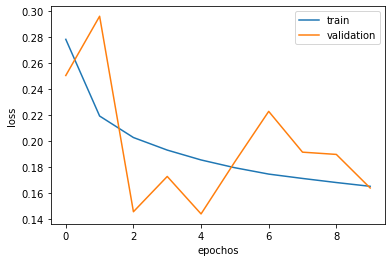

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochos')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

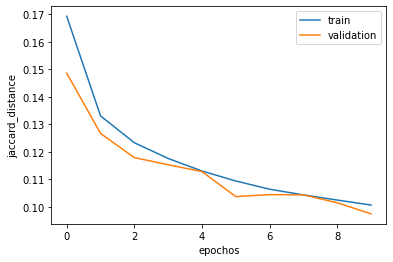

In [28]:
plt.plot(history.history['jaccard_distance'])
plt.plot(history.history['val_jaccard_distance'])
plt.xlabel('epochos')
plt.ylabel('jaccard_distance')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

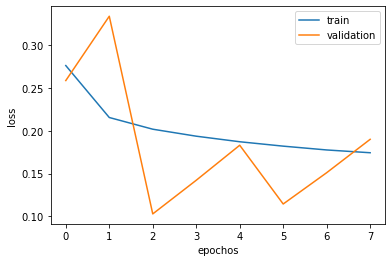

In [29]:
other_model_hist = pickle.load(open('D:\\user_data\\xtrnavska\\dumps\\models\\mod_1_history', "rb"))

plt.plot(other_model_hist['loss'])
plt.plot(other_model_hist['val_loss'])
plt.xlabel('epochos')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


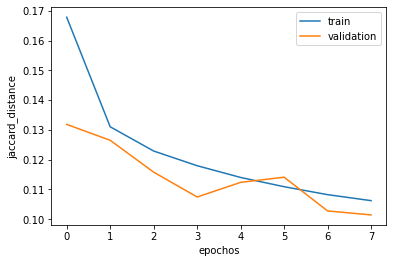

In [30]:
plt.plot(other_model_hist['jaccard_distance'])
plt.plot(other_model_hist['val_jaccard_distance'])
plt.xlabel('epochos')
plt.ylabel('jaccard_distance')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
